![CARCASSONNE](Logo.png)


# PROJET STID 2020-2021
### LES ÉTABLISSEMENTS LES PLUS CONVOITÉS SELON RÉGION ET FILIÈRE DE FORMATION EN 2018

@author: **Jéros VIGAN**


## =============================================================================
##  IMPORTATION DES MODULES 
## =============================================================================

In [10]:
import pandas as pd
import pandas.plotting
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from collections import Counter
import time

from scipy.stats import norm
from statsmodels.stats.proportion import proportion_confint
import scipy
import statsmodels
from scipy.stats import chi2_contingency
from scipy.stats import ks_2samp
import scipy.stats as stats
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

In [11]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)

### ===============================================================
###  Déclaration du dossier de travail
### ===============================================================

In [12]:
import os
base= r'C:\Users\Jéros\01_TraitementFichier\projetSTID'
base=base.replace('\\','/')
os.chdir(base)
os.getcwd()

'C:\\Users\\Jéros\\01_TraitementFichier\\projetSTID'

In [13]:
for file in os.listdir():
    print('ce dossier contient :', file)

ce dossier contient : functions.py
ce dossier contient : function_biplot.py
ce dossier contient : parcousup-2018.csv
ce dossier contient : parcousup-2019.csv
ce dossier contient : __pycache__


### ===============================================================
### importation des  données 
### ===============================================================

In [14]:
Dataset2018=pd.read_csv("parcousup-2018.csv",sep=";",encoding='ISO-8859-1')

In [15]:
Dataset2018.sample(5)

Session Code UAI de l'établissement  \
2183     2018                    0132123M   
5934     2018                    9740472V   
5947     2018                    0640181Z   
5109     2018                    0451526P   
3886     2018                    0490970N   

                                          Établissement  \
2183  Aix Marseille Université - site d'Aix-en-Provence   
5934               Lycée professionnel Patu De Rosemont   
5947                      Lycée professionnel St Joseph   
5109                                Lycée Charles Peguy   
3886                                  Université Angers   

     Code départemental de létablissement Département de létablissement  \
2183                                    13               Bouches-du-Rhône   
5934                                   974                     La Réunion   
5947                                    64           Pyrénées-Atlantiques   
5109                                    45                         Loiret   
3886                                    49                 Maine-et-Loire   

       Région de létablissement Académie de létablissement  \
2183  Provence Alpes Côte d'Azur               Aix-Marseille   
5934                  La Réunion                     Réunion   
5947          Nouvelle-Aquitaine                    Bordeaux   
5109         Centre-Val de Loire               Orléans-Tours   
3886            Pays de la Loire                      Nantes   

     Filière de formation très agrégée  \
2183                           Licence   
5934                               BTS   
5947                               BTS   
5109                   Autre formation   
3886                           Licence   

                           Filière de formation  \
2183             Licence - Arts-lettres-langues   
5934                           BTS - Production   
5947                           BTS - Production   
5109                                    DN MADE   
3886  Licence - Sciences - technologies - santé   

     Concours communs et banques d'épreuves  \
2183                                    NaN   
5934                                    NaN   
5947                                    NaN   
5109                                    NaN   
3886                                    NaN   

                         Filière de formation détaillée  \
2183  Langues, littératures & civilisations étrangèr...   
5934  Maintenance des systèmes - option A Systèmes d...   
5947  Systèmes numériques - Option informatique et r...   
5109                                            Portail   
3886                                      Mathématiques   

                    Filière de formation très détaillée  \
2183                                            Anglais   
5934                                                NaN   
5947                                                NaN   
5109  1ère année commune Espace - Evénement - Graphi...   
3886  MPCIE, mentions Mathématiques, Physique, Chimi...   

      Lien de la formation sur la plateforme Parcoursup  \
2183  https://dossier.parcoursup.fr/Candidat/candida...   
5934  https://dossier.parcoursup.fr/Candidat/candida...   
5947  https://dossier.parcoursup.fr/Candidat/candida...   
5109  https://dossier.parcoursup.fr/Candidat/candida...   
3886  https://dossier.parcoursup.fr/Candidat/candida...   

     Coordonnées GPS de la formation  \
2183                  43.4912,5.3327   
5934                -21.0422,55.7175   
5947                 43.3812,-1.3048   
5109                  47.8892,1.8979   
3886                 47.4773,-0.5499   

      Capacité de létablissement par formation  \
2183                                        356   
5934                                         15   
5947                                         12   
5109                                         30   
3886                                        200   

      Effectif total des candidats pour une formation  \
2183               

In [16]:
df=Dataset2018.copy()
print(df.columns)

Index(['Session', 'Code UAI de l'établissement', 'Établissement',
       'Code départemental de létablissement',
       'Département de létablissement', 'Région de létablissement',
       'Académie de létablissement', 'Filière de formation très agrégée',
       'Filière de formation', 'Concours communs et banques d'épreuves',
       'Filière de formation détaillée', 'Filière de formation très détaillée',
       'Lien de la formation sur la plateforme Parcoursup',
       'Coordonnées GPS de la formation',
       'Capacité de létablissement par formation',
       'Effectif total des candidats pour une formation',
       'Dont effectif des candidates pour une formation',
       'Effectif total des candidats en phase principale',
       'Dont effectif des candidats ayant postulé en internat',
       'Effectif des candidats néo bacheliers généraux en phase principale',
       'Dont effectif des candidats boursiers néo bacheliers généraux en phase principale',
       'Effectif des candi

In [17]:
def dataset_info(dataset):
    print(' ● taille:', dataset.shape)
    print('-------------------------')
    time.sleep(1)
    print(' ● types de données:\n', dataset.dtypes.value_counts())
    print('-------------------------')
    time.sleep(2)
    print(' ● valeurs manquantes:', sum(pd.DataFrame(dataset).isnull().sum(axis=1).tolist()))
    print('-------------------------')
    time.sleep(2)
    print(' ● nombre de valeurs:', dataset.shape[0]*dataset.shape[1])

In [18]:
dataset_info(df)

 ● taille: (10697, 85)
-------------------------
 ● types de données:
 int64      47
float64    24
object     14
dtype: int64
-------------------------
 ● valeurs manquantes: 81628
-------------------------
 ● nombre de valeurs: 909245


<AxesSubplot:ylabel='None'>

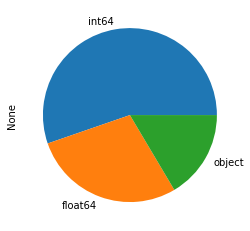

In [19]:
df.dtypes.value_counts().plot.pie()

<AxesSubplot:>

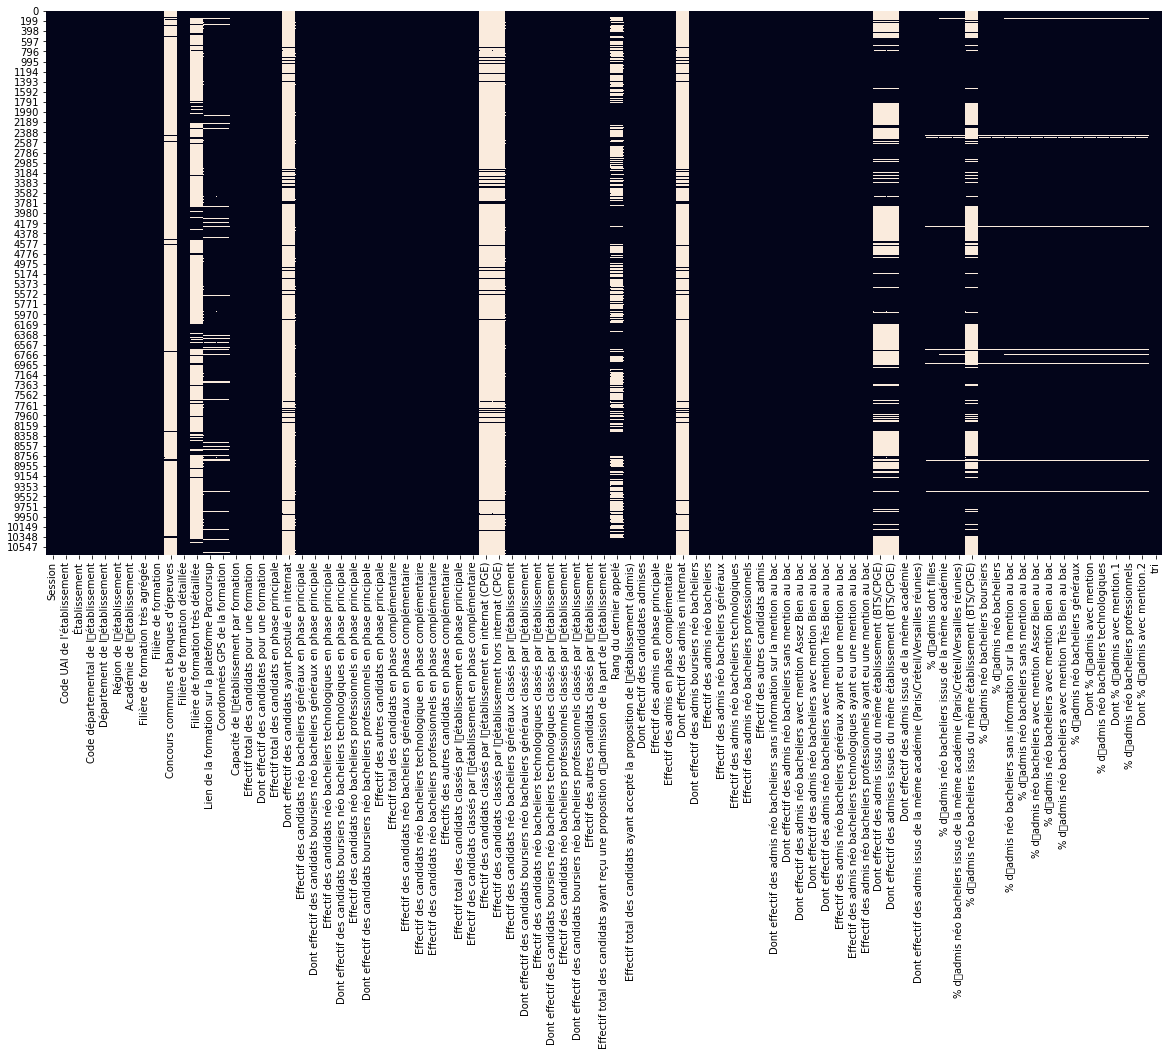

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

## Suppression des variables ayant des valeurs manquantes

In [21]:
def val_manquant(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return  missing_data

In [22]:
val_manquant(df)

Total   Percent
Concours communs et banques d'épreuves              10422  0.974292
Effectif des candidats classés par létablissem...   9851  0.920912
Effectif des candidats classés par létablissem...   9851  0.920912
Dont effectif des admis en internat                  9851  0.920912
Dont effectif des candidats ayant postulé en in...   9851  0.920912
Filière de formation très détaillée                  8278  0.773862
Rang du dernier appelé                               5211  0.487146
% dadmis néo bacheliers issus du même établiss...   4759  0.444891
Dont effectif des admises issues du même établi...   4751  0.444143
Dont effectif des admis issus du même établisse...   4751  0.444143
Coordonnées GPS de la formation                       817  0.076377
Lien de la formation sur la plateforme Parcoursup     817  0.076377
Dont % dadmis avec mention                           165  0.015425
% dadmis néo bacheliers professionnels               165  0.015425
Dont % dadmis avec mention.2                         165  0.015425
Dont % dadmis avec mention.1                         165  0.015425
% dadmis néo bacheliers généraux                     165  0.015425
% dadmis néo bacheliers technologiques               165  0.015425
% dadmis néo bacheliers issus de la même académie    165  0.015425
% dadmis néo bacheliers issus de la même acadé...    165  0.015425
% dadmis néo bacheliers avec mention Très Bien...    165  0.015425
% dadmis néo bacheliers avec mention Bien au bac     165  0.015425
% dadmis néo bacheliers avec mention Assez Bie...    165  0.015425
% dadmis néo bacheliers sans mention au bac          165  0.015425
% dadmis néo bacheliers sans information sur l...    165  0.015425
% dadmis néo bacheliers boursiers                     91  0.008507
% dadmis néo bacheliers                               91  0.008507
% dadmis dont filles                                  91  0.008507
Dont effectif des candidats boursiers néo bache...      0  0.000000
Effectif des candidats néo bacheliers technolog...      0  0.000000
Effectif des candidats néo bacheliers technolog...      0  0.000000
Dont effectif des candidats boursiers néo bache...      0  0.000000
Effectif des candidats néo bacheliers généraux ...      0  0.000000
Effectif des candidats néo bacheliers professio...      0  0.000000
Dont effectif des candidats boursiers néo bache...      0  0.000000
Effectif des autres candidats en phase principale       0  0.000000
Effectif total des candidats en phase complémen...      0  0.000000
Effectif des candidats néo bacheliers généraux ...      0  0.000000
tri                                                     0  0.000000
Filière de formation                                    0  0.000000
Effectif total des candidats en phase principale        0  0.000000
Dont effectif des candidates pour une formation         0  0.000000
Effectif total des candidats pour une formation         0  0.000000
Capacité de létablissement par formation               0  0.000000
Filière de formation détaillée                          0  0.000000
Effectifs des autres candidats en phase complém...      0  0.000000
Filière de formation très agrégée                       0  0.000000
Académie de létablissement                             0  0.000000
Région de létablissement                               0  0.000000
Département de létablissement                          0  0.000000
Code départemental de létablissement                   0  0.000000
Établissement                                           0  0.000000
Code UAI de l'établissement                             0  0.000000
Effectif des candidats néo bacheliers professio...      0  0.000000
Effectif total des candidats ayant reçu une pro...      0  0.000000
Effectif total des candidats classés par létab...      0  0.000000
Effectif des candidats classés par létablissem...      0  0.000000
Dont effectif des admis issus de la même académ...      0  0.000000
Dont effectif des admis issus de la même

In [23]:
df[df.columns[df.isna().sum()/df.shape[0]>0.9]]

Concours communs et banques d'épreuves  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
...                                      ...   
10692                                    NaN   
10693                                    NaN   
10694                                    NaN   
10695                                    NaN   
10696                                    NaN   

       Dont effectif des candidats ayant postulé en internat  \
0                                                    NaN       
1                                                    NaN       
2                                                    NaN       
3                                                    NaN       
4                                                    NaN       
...                                                  ...       
10692                                                NaN       
10693                                                NaN       
10694                                                NaN       
10695                                                NaN       
10696                                                NaN       

       Effectif des candidats classés par létablissement en internat (CPGE)  \
0                                                    NaN                       
1                                                    NaN                       
2                                                    NaN                       
3                                                    NaN                       
4                                                    NaN                       
...                                                  ...                       
10692                                                NaN                       
10693                                                NaN                       
10694                                                NaN                       
10695                                                NaN                       
10696                                                NaN                       

       Effectif des candidats classés par létablissement hors internat (CPGE)  \
0                                                    NaN                         
1                                                    NaN                         
2                                                    NaN                         
3                                                    NaN                         
4                                                    NaN                         
...                                                  ...                         
10692                                                NaN                         
10693                                                NaN                         
10694                                                NaN                         
10695                                                NaN                         
10696                                                NaN                         

       Dont effectif des admis en internat  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN  
...                                    ...  
10692                                  NaN  
10693                                  NaN  
10694                                  NaN  
10695                                  NaN  
10696                                  NaN  

[10697 rows x 5 columns]

In [24]:
df=df[df.columns[df.isna().sum()/df.shape[0]<0.9]]

<AxesSubplot:>

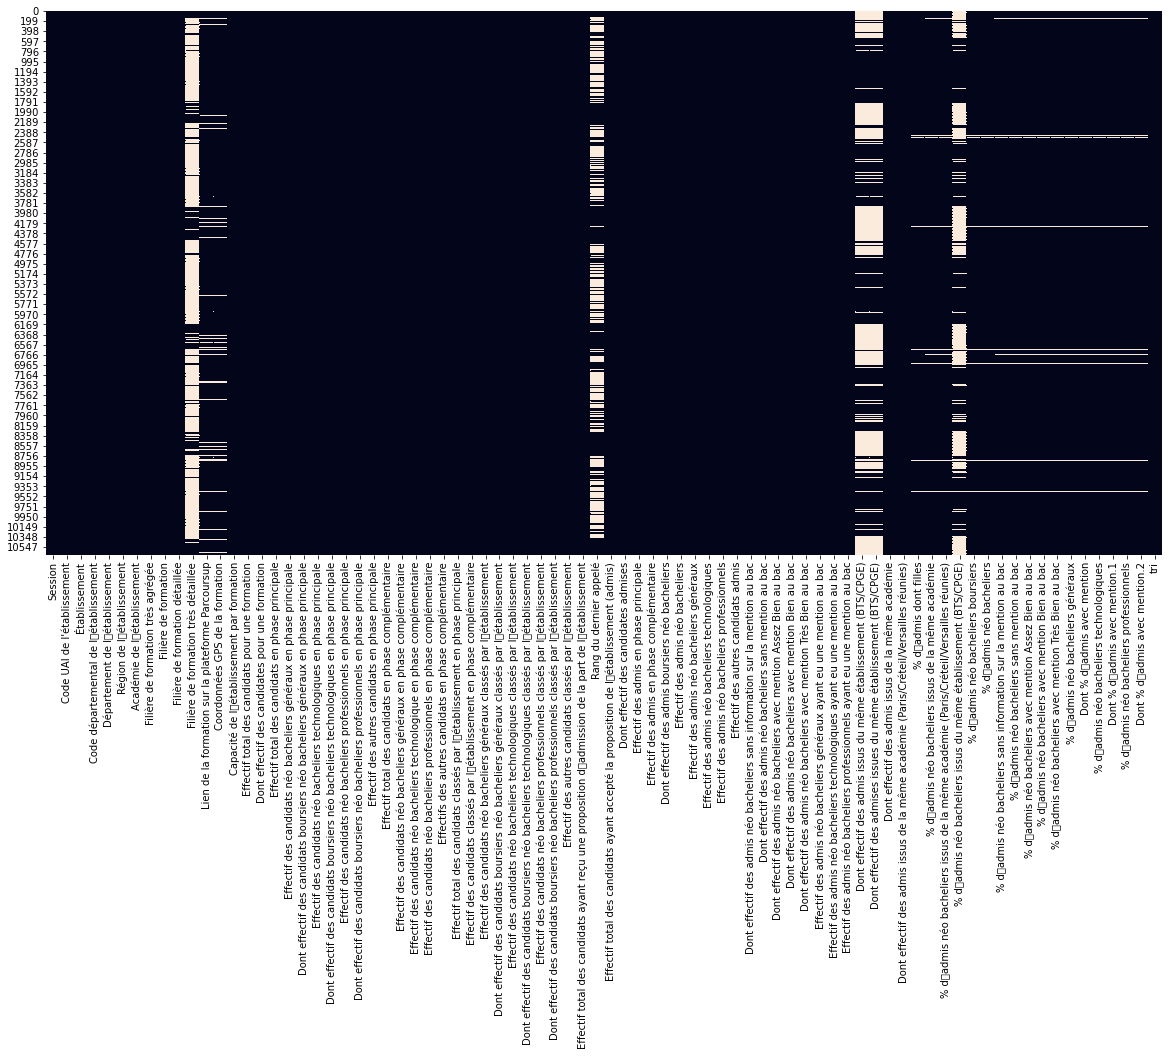

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

### Selection des Variables à étudier

In [26]:
cols = ['Établissement',
    'Région de l\x92établissement',
        'Filière de formation',
        'Capacité de l\x92établissement par formation',
        'Effectif total des candidats pour une formation',
     'Dont effectif des candidates pour une formation',
     'Effectif total des candidats en phase principale']
cols

['Établissement',
 'Région de l\x92établissement',
 'Filière de formation',
 'Capacité de l\x92établissement par formation',
 'Effectif total des candidats pour une formation',
 'Dont effectif des candidates pour une formation',
 'Effectif total des candidats en phase principale']

In [27]:
df=df[cols];
df.sample(5)

Établissement  \
8912    I.U.T de Nancy-Brabois - Université de Lorraine   
4149  Université de Versailles - Saint Quentin en Yv...   
7169                               Lycée Antonin Artaud   
2782               Lycée Brest - Rive Droite - Javouhey   
7942                           Lycée Pierre Brossolette   

       Région de létablissement            Filière de formation  \
8912                   Grand Est                DUT - Production   
4149               Ile-de-France  Licence - Arts-lettres-langues   
7169  Provence Alpes Côte d'Azur                BTS - Production   
2782                    Bretagne                  BTS - Services   
7942        Auvergne-Rhône-Alpes                  BTS - Services   

      Capacité de létablissement par formation  \
8912                                         42   
4149                                        147   
7169                                         30   
2782                                         35   
7942                                         35   

      Effectif total des candidats pour une formation  \
8912                                              210   
4149                                              876   
7169                                              338   
2782                                              167   
7942                                              815   

      Dont effectif des candidates pour une formation  \
8912                                               61   
4149                                              653   
7169                                                9   
2782                                              127   
7942                                              449   

      Effectif total des candidats en phase principale  
8912                                               174  
4149                                               733  
7169                                               338  
2782                                               160  
7942                                               815

In [28]:
df=df.set_index('Établissement')
dataset_info(df)

 ● taille: (10697, 6)
-------------------------
 ● types de données:
 int64     4
object    2
dtype: int64
-------------------------
 ● valeurs manquantes: 0
-------------------------
 ● nombre de valeurs: 64182


## Quanti 

In [29]:
df.select_dtypes('int64').columns

Index(['Capacité de létablissement par formation',
       'Effectif total des candidats pour une formation',
       'Dont effectif des candidates pour une formation',
       'Effectif total des candidats en phase principale'],
      dtype='object')

In [30]:
df.select_dtypes('int64').head(5)

Capacité de létablissement par formation  \
Établissement                                                                                
Université Grenoble Alpes - Antennes de Valence                                         35   
Universite Jean Monnet, Saint-Etienne                                                  175   
Universite Jean Monnet, Saint-Etienne                                                   30   
Universite Jean Monnet, Saint-Etienne                                                   55   
Universite Jean Monnet, Saint-Etienne                                                   45   

                                                 Effectif total des candidats pour une formation  \
Établissement                                                                                      
Université Grenoble Alpes - Antennes de Valence                                              251   
Universite Jean Monnet, Saint-Etienne                                                       1096   
Universite Jean Monnet, Saint-Etienne                                                        143   
Universite Jean Monnet, Saint-Etienne                                                        223   
Universite Jean Monnet, Saint-Etienne                                                        145   

                                                 Dont effectif des candidates pour une formation  \
Établissement                                                                                      
Université Grenoble Alpes - Antennes de Valence                                              153   
Universite Jean Monnet, Saint-Etienne                                                        850   
Universite Jean Monnet, Saint-Etienne                                                         99   
Universite Jean Monnet, Saint-Etienne                                                        176   
Universite Jean Monnet, Saint-Etienne                                                        110   

                                                 Effectif total des candidats en phase principale  
Établissement                                                                                      
Université Grenoble Alpes - Antennes de Valence                                               172  
Universite Jean Monnet, Saint-Etienne                                                        1095  
Universite Jean Monnet, Saint-Etienne                                                         103  
Universite Jean Monnet, Saint-Etienne                                                         184  
Universite Jean Monnet, Saint-Etienne                                                          84

In [31]:
df_resu=df.groupby('Établissement').sum()
df_resu.sample(5)

Capacité de létablissement par formation  \
Établissement                                                                
Lycée Bertrand D'Argentre                                               70   
Lycée agricole d'Yvetot                                                 59   
EREA Toulouse Lautrec                                                   30   
Institut Catholique de Toulouse                                        950   
I.U.T. de Sceaux - Paris 11                                            644   

                                 Effectif total des candidats pour une formation  \
Établissement                                                                      
Lycée Bertrand D'Argentre                                                   1287   
Lycée agricole d'Yvetot                                                      532   
EREA Toulouse Lautrec                                                        390   
Institut Catholique de Toulouse                                             1688   
I.U.T. de Sceaux - Paris 11                                                11194   

                                 Dont effectif des candidates pour une formation  \
Établissement                                                                      
Lycée Bertrand D'Argentre                                                    878   
Lycée agricole d'Yvetot                                                      285   
EREA Toulouse Lautrec                                                        244   
Institut Catholique de Toulouse                                             1191   
I.U.T. de Sceaux - Paris 11                                                 5673   

                                 Effectif total des candidats en phase principale  
Établissement                                                                      
Lycée Bertrand D'Argentre                                                    1226  
Lycée agricole d'Yvetot                                                       524  
EREA Toulouse Lautrec                                                         344  
Institut Catholique de Toulouse                                              1439  
I.U.T. de Sceaux - Paris 11                                                 11194

In [32]:
print("la taille du tableau quanti",df.select_dtypes('int64').shape)
print("-------------------------------")
print("la taille du taille reduit par Etablissement",df_resu.shape)

la taille du tableau quanti (10697, 4)
-------------------------------
la taille du taille reduit par Etablissement (2647, 4)


In [33]:
df.select_dtypes('int64').describe()

Capacité de létablissement par formation  \
count                               10697.000000   
mean                                   64.196036   
std                                   123.008223   
min                                     1.000000   
25%                                    24.000000   
50%                                    34.000000   
75%                                    55.000000   
max                                  3100.000000   

       Effectif total des candidats pour une formation  \
count                                     10697.000000   
mean                                        730.049266   
std                                        1739.336327   
min                                           1.000000   
25%                                         151.000000   
50%                                         313.000000   
75%                                         701.000000   
max                                       21829.000000   

       Dont effectif des candidates pour une formation  \
count                                     10697.000000   
mean                                        335.644106   
std                                         672.734213   
min                                           0.000000   
25%                                          41.000000   
50%                                         139.000000   
75%                                         347.000000   
max                                       10510.000000   

       Effectif total des candidats en phase principale  
count                                      10697.000000  
mean                                         698.538001  
std                                         1734.500834  
min                                            0.000000  
25%                                          132.000000  
50%                                          285.000000  
75%                                          657.000000  
max                                        21829.000000

In [34]:
df_resu.describe()

Capacité de létablissement par formation  \
count                                2647.000000   
mean                                  259.427654   
std                                   874.393123   
min                                     2.000000   
25%                                    33.000000   
50%                                    70.000000   
75%                                   157.000000   
max                                 12371.000000   

       Effectif total des candidats pour une formation  \
count                                      2647.000000   
mean                                       2950.259539   
std                                        6757.493251   
min                                           2.000000   
25%                                         258.500000   
50%                                         727.000000   
75%                                        2321.000000   
max                                       97211.000000   

       Dont effectif des candidates pour une formation  \
count                                      2647.000000   
mean                                       1356.397809   
std                                        3596.811209   
min                                           0.000000   
25%                                          88.500000   
50%                                         326.000000   
75%                                        1050.000000   
max                                       57689.000000   

       Effectif total des candidats en phase principale  
count                                       2647.000000  
mean                                        2822.916887  
std                                         6476.744990  
min                                            0.000000  
25%                                          231.000000  
50%                                          674.000000  
75%                                         2206.000000  
max                                        94661.000000

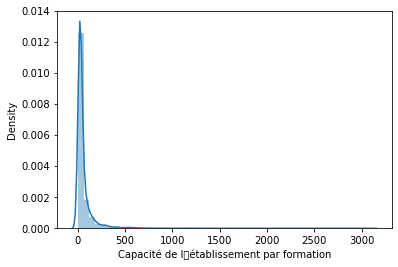

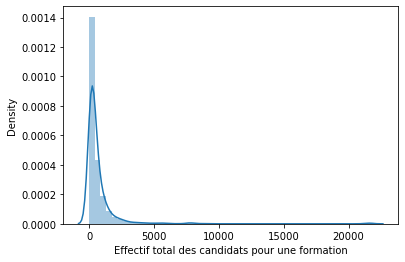

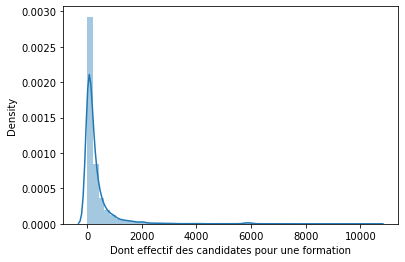

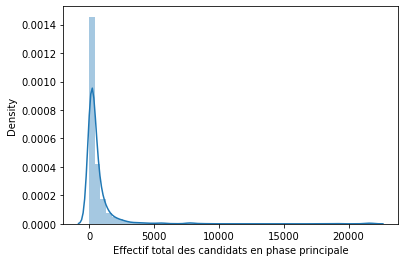

In [35]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df.select_dtypes('int64')[col])

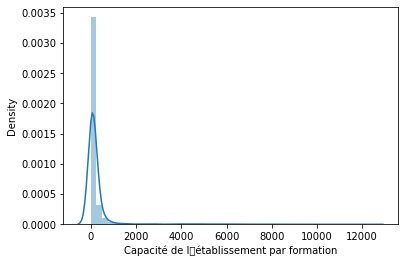

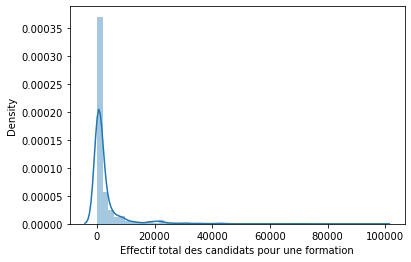

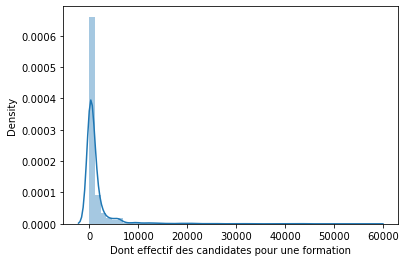

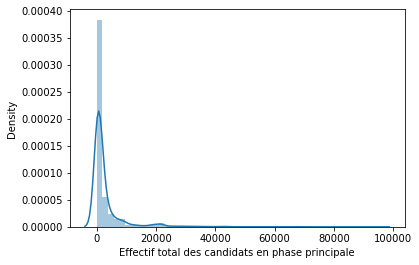

In [36]:
for col in df_resu:
    plt.figure()
    sns.distplot(df_resu[col])

## Conformité à la loi normale: test de de Kolmogorov-Smirnov

- **H0 : l’échantillon de chaque variable suit une loi normale**
- **H1 : l’échantillon de chaque variable ne suit pas une loi normale**

In [37]:
def Kolmogorov(col):
    alpha = 0.05
    stat, p =ks_2samp(df[col],list(np.random.normal(np.mean(df[col]), np.std(df[col]), 1000)))
    if p < alpha:
        return 'H0 Rejetée -- test significatif au niveau 5%'
    else :
        return 'Non H0 Rejetée -- test non significatif au niveau 5%'

In [38]:
for col in df.select_dtypes('int64'):
    print(" ")
    print(f'{col :-<50} {Kolmogorov(col)}')

 
Capacité de létablissement par formation--------- H0 Rejetée -- test significatif au niveau 5%
 
Effectif total des candidats pour une formation--- H0 Rejetée -- test significatif au niveau 5%
 
Dont effectif des candidates pour une formation--- H0 Rejetée -- test significatif au niveau 5%
 
Effectif total des candidats en phase principale-- H0 Rejetée -- test significatif au niveau 5%


## Conformité à la loi normale: test de normalité d'Agostino

In [39]:
def Agostino(col):
    alpha = 0.05
    stat, p =stats.normaltest(df[col])
    if p < alpha:
        return 'H0 Rejetée -- test significatif au niveau 5%'
    else :
        return 'Non H0 Rejetée -- test non significatif au niveau 5%'

In [40]:
for col in df.select_dtypes('int64'):
    print(" ")
    print(f'{col :-<50} {Agostino(col)}')

 
Capacité de létablissement par formation--------- H0 Rejetée -- test significatif au niveau 5%
 
Effectif total des candidats pour une formation--- H0 Rejetée -- test significatif au niveau 5%
 
Dont effectif des candidates pour une formation--- H0 Rejetée -- test significatif au niveau 5%
 
Effectif total des candidats en phase principale-- H0 Rejetée -- test significatif au niveau 5%


### Quali 2018

In [41]:
sns.set_theme(style="whitegrid")

Ile-de-France                 1932
Auvergne-Rhône-Alpes          1279
Hauts-de-France               1006
Grand Est                      917
Occitanie                      915
Nouvelle-Aquitaine             907
Provence Alpes Côte d'Azur     637
Pays de la Loire               622
Bretagne                       574
Normandie                      511
Bourgogne-Franche-Comté        464
Centre-Val de Loire            391
La Réunion                     167
Martinique                     100
Guadeloupe                      93
Polynésie française             61
Corse                           53
Guyane                          41
Mayotte                         21
Etranger                         6
Name: Région de létablissement, dtype: int64


<AxesSubplot:>

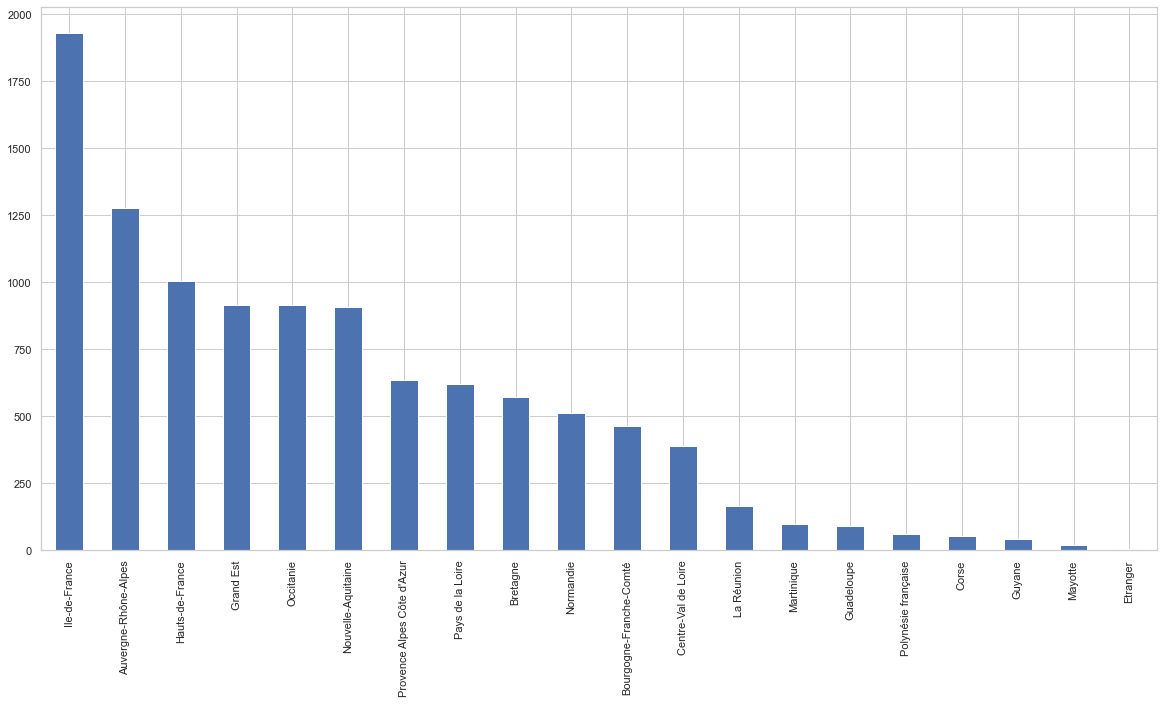

In [42]:
print(df['Région de l\x92établissement'].value_counts())
plt.figure(figsize=(20,10))
#df.groupby('Région de l\x92établissement').size().plot.hist()
df['Région de l\x92établissement'].value_counts().plot.bar()

BTS - Services                                                               2843
BTS - Production                                                             1761
Licence - Arts-lettres-langues                                               1003
Licence - Sciences - technologies - santé                                     600
BTSA                                                                          496
Licence - Sciences humaines et sociales                                       479
DUT - Production                                                              471
Classe préparatoire scientifique                                              443
Licence - Droit-économie-gestion                                              386
DUT - Service                                                                 318
Formations d'ingénieurs                                                       284
Classe préparatoire économique et commerciale                                 267
Mention compléme

<AxesSubplot:>

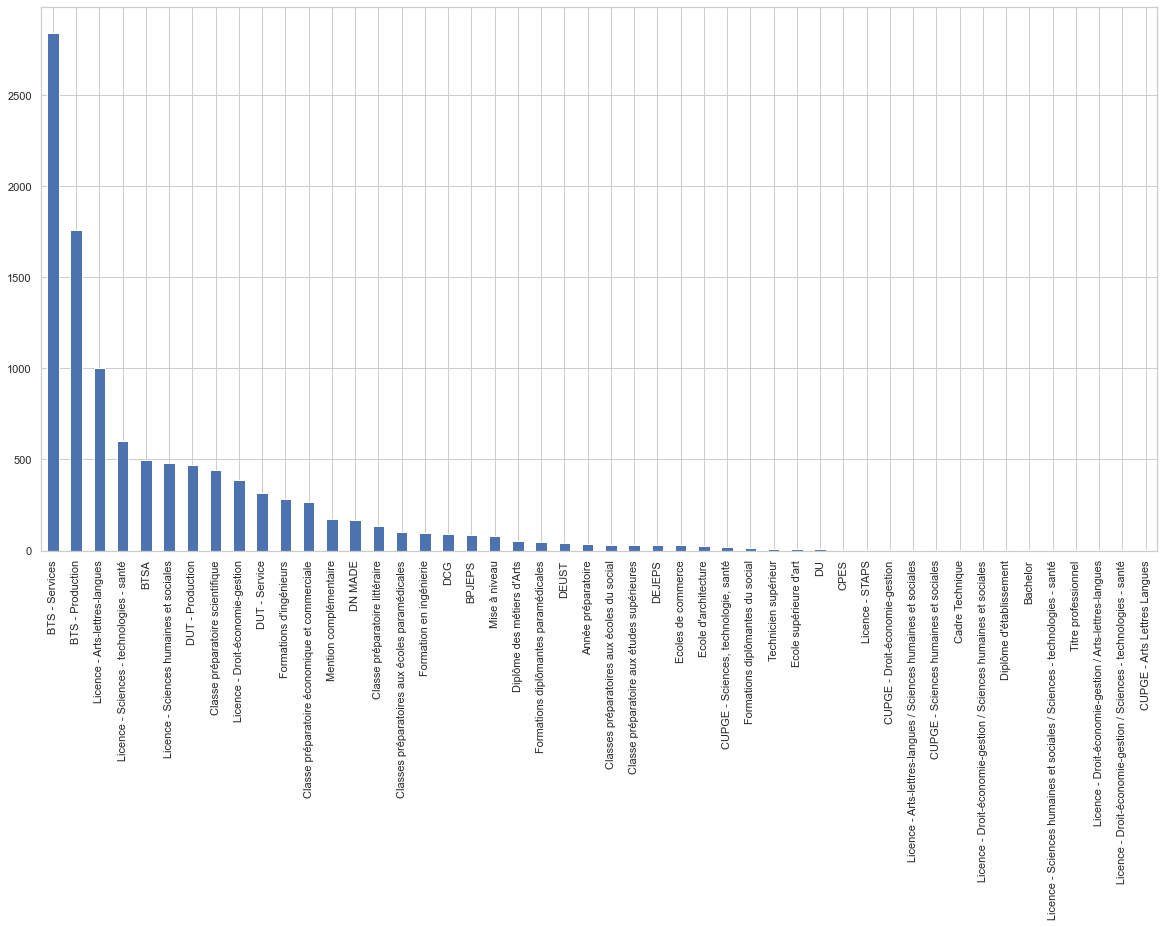

In [43]:
print(df['Filière de formation'].value_counts())
plt.figure(figsize=(20,10))
#df.groupby('Filière de formation').size().plot.hist()
df['Filière de formation'].value_counts().plot.bar()

## quanti * quanti  2018

<Figure size 1440x720 with 0 Axes>

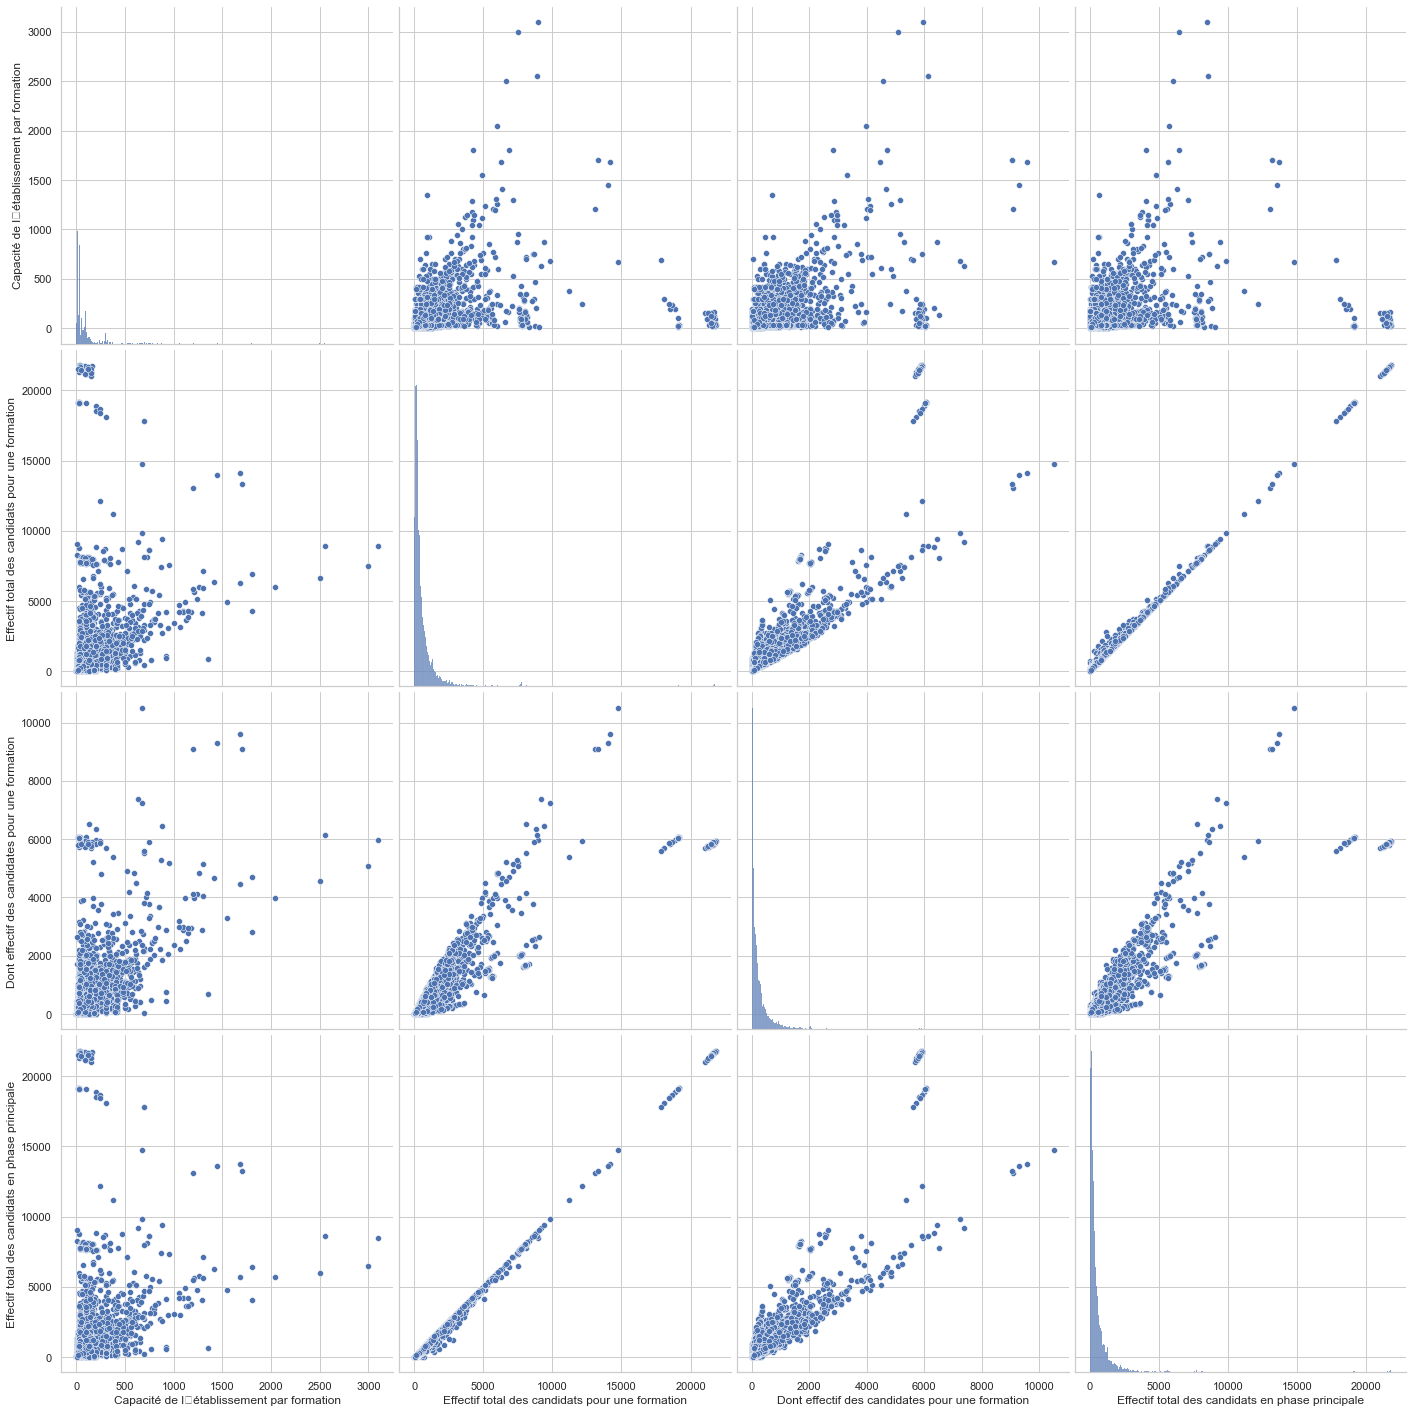

In [44]:
plt.figure(figsize=(20,10))
sns.pairplot(df.select_dtypes('int64'),size = 5)

<Figure size 1440x720 with 0 Axes>

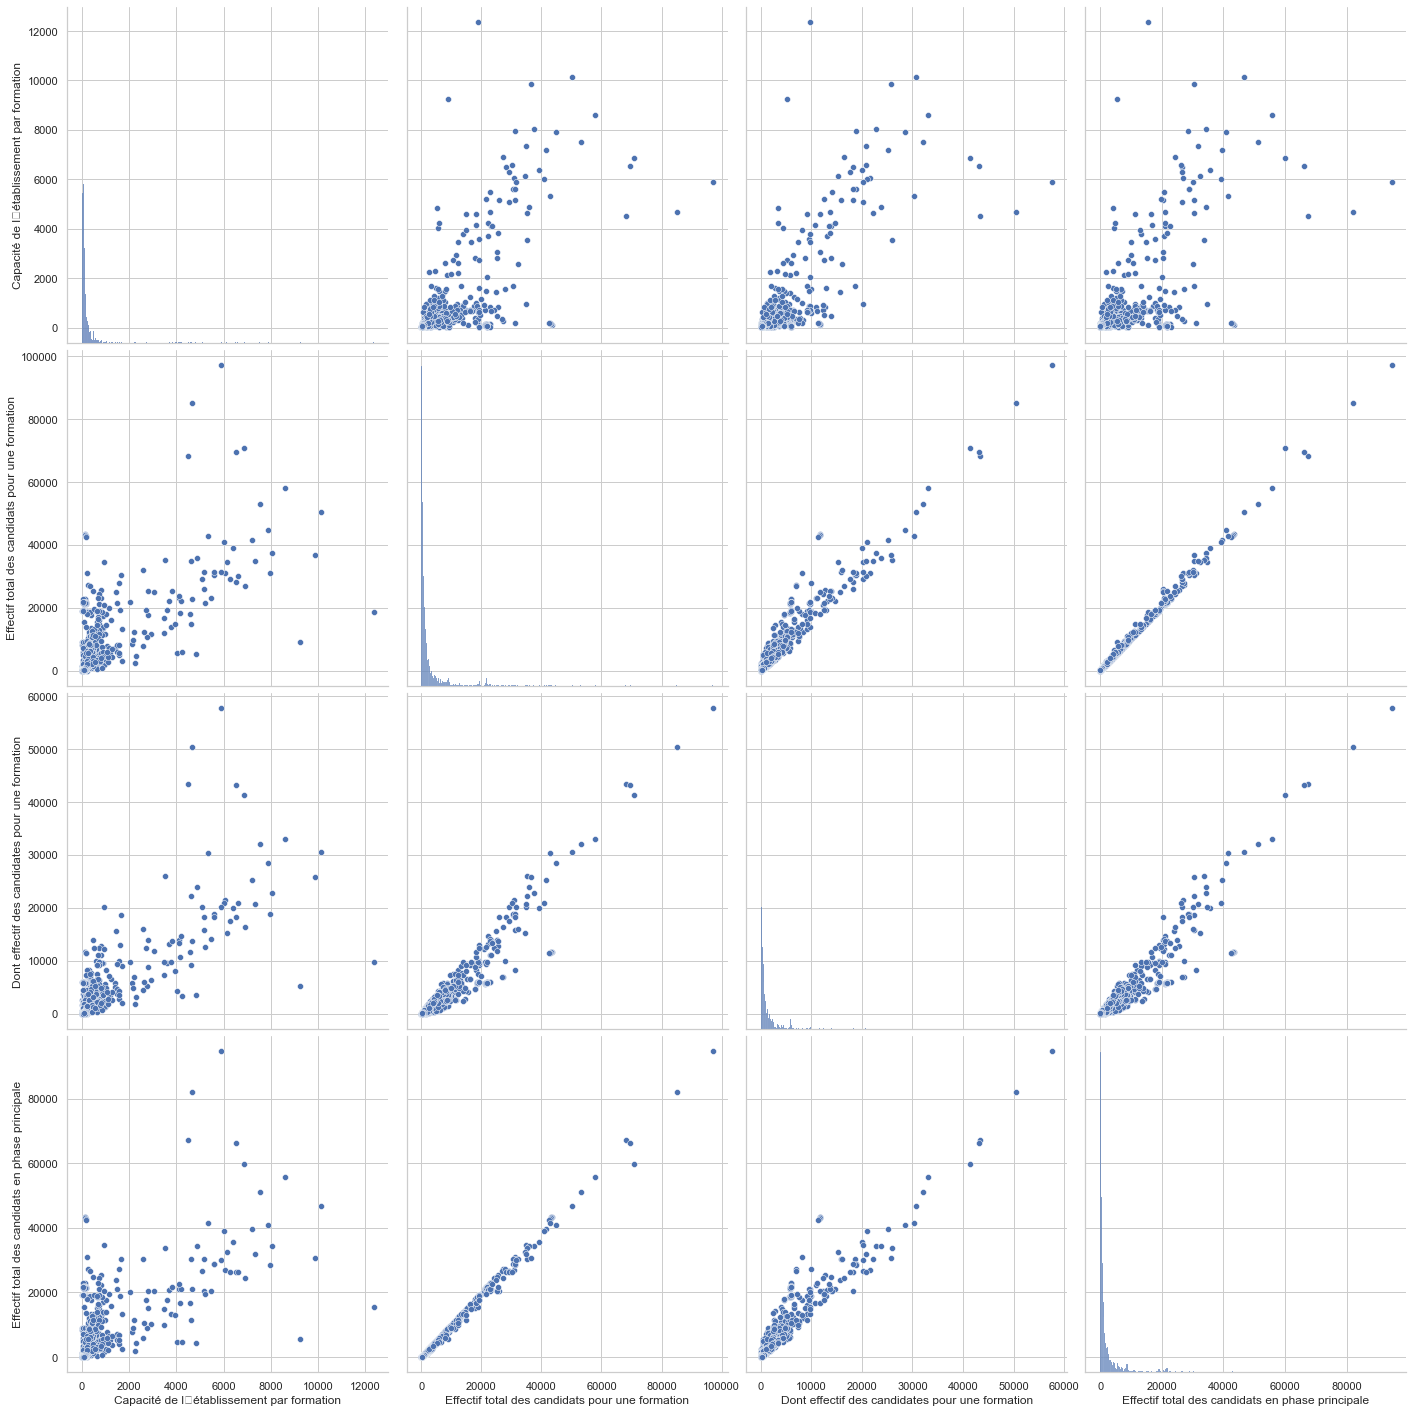

In [45]:
plt.figure(figsize=(20,10))
sns.pairplot(df_resu,size = 5)

<AxesSubplot:>

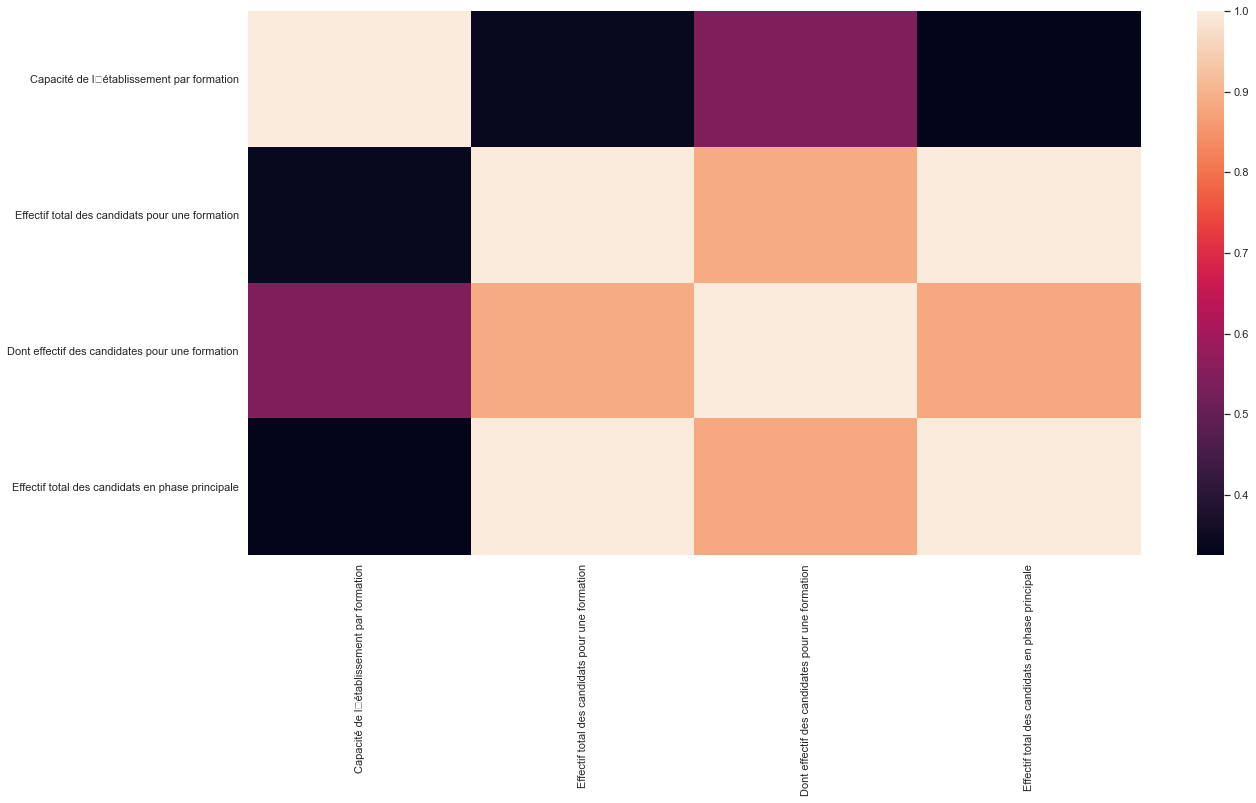

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(df.select_dtypes('int64').corr())

<AxesSubplot:>

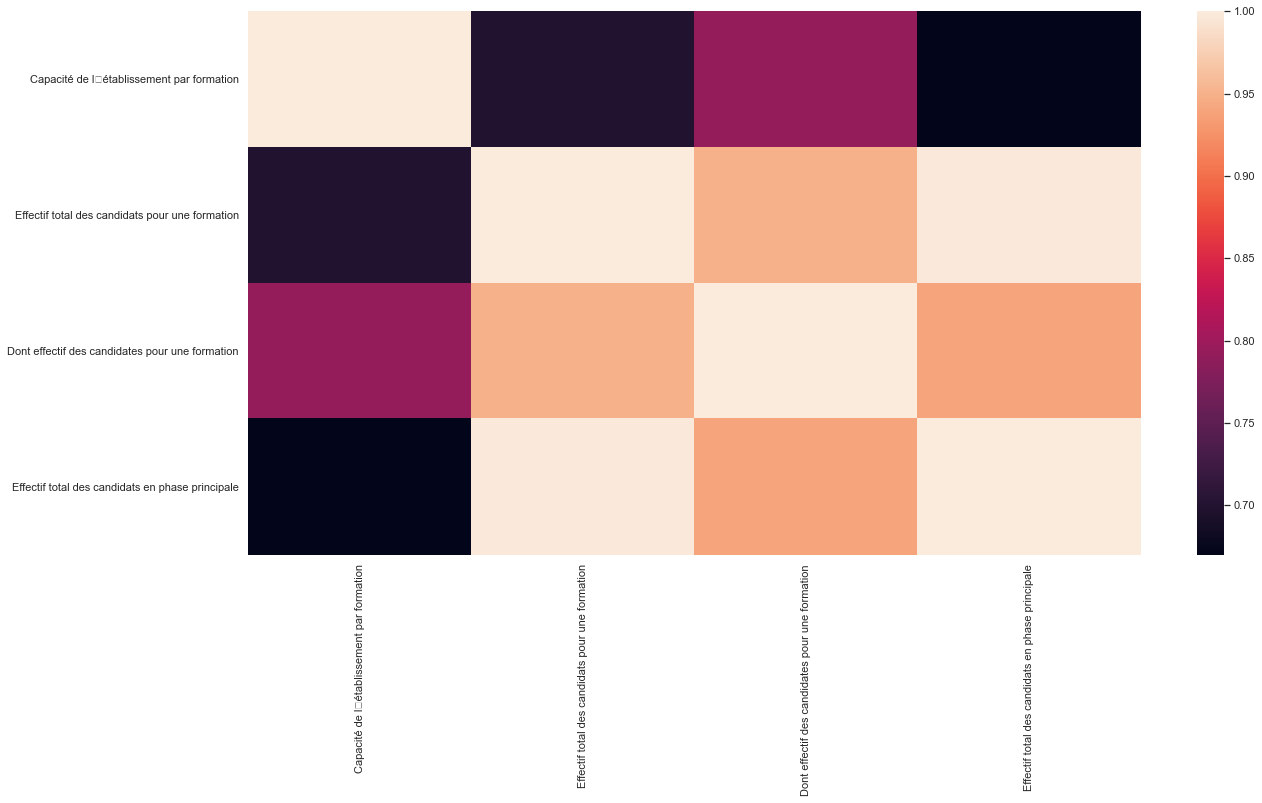

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(df_resu.corr())

<AxesSubplot:title={'center':'correlations des quanti'}>

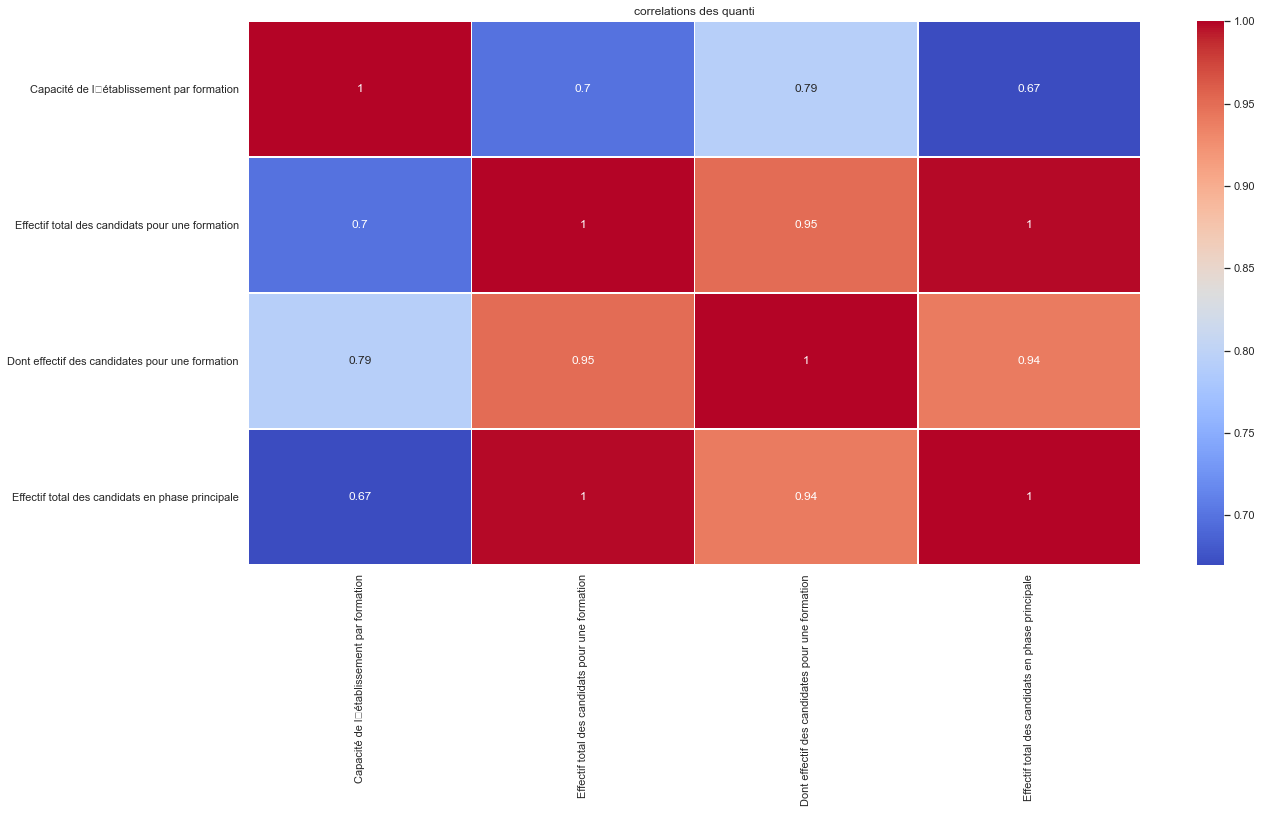

In [48]:
plt.figure(figsize=(20,10))
plt.title('correlations des quanti')
sns.heatmap(df_resu.corr(), annot=True, linewidth=0.5, cmap='coolwarm')

In [49]:
import researchpy as rp
corr_type, corr_matrix, corr_ps = rp.corr_case(df_resu)
print(corr_type)

  Pearson correlation test using list-wise deletion
0                    Total observations used = 2647


In [50]:
corr_matrix

Capacité de létablissement par formation  \
Capacité de létablissement par formation                                                1   
Effectif total des candidats pour une formation                                      0.699   
Dont effectif des candidates pour une formation                                     0.7937   
Effectif total des candidats en phase principale                                      0.67   

                                                 Effectif total des candidats pour une formation  \
Capacité de létablissement par formation                                                  0.699   
Effectif total des candidats pour une formation                                                1   
Dont effectif des candidates pour une formation                                           0.9502   
Effectif total des candidats en phase principale                                          0.9984   

                                                 Dont effectif des candidates pour une formation  \
Capacité de létablissement par formation                                                 0.7937   
Effectif total des candidats pour une formation                                           0.9502   
Dont effectif des candidates pour une formation                                                1   
Effectif total des candidats en phase principale                                          0.9398   

                                                 Effectif total des candidats en phase principale  
Capacité de létablissement par formation                                                    0.67  
Effectif total des candidats pour une formation                                            0.9984  
Dont effectif des candidates pour une formation                                            0.9398  
Effectif total des candidats en phase principale                                                1

In [51]:
corr_ps

Capacité de létablissement par formation  \
Capacité de létablissement par formation                                           0.0000   
Effectif total des candidats pour une formation                                     0.0000   
Dont effectif des candidates pour une formation                                     0.0000   
Effectif total des candidats en phase principale                                    0.0000   

                                                 Effectif total des candidats pour une formation  \
Capacité de létablissement par formation                                                 0.0000   
Effectif total des candidats pour une formation                                           0.0000   
Dont effectif des candidates pour une formation                                           0.0000   
Effectif total des candidats en phase principale                                          0.0000   

                                                 Dont effectif des candidates pour une formation  \
Capacité de létablissement par formation                                                 0.0000   
Effectif total des candidats pour une formation                                           0.0000   
Dont effectif des candidates pour une formation                                           0.0000   
Effectif total des candidats en phase principale                                          0.0000   

                                                 Effectif total des candidats en phase principale  
Capacité de létablissement par formation                                                  0.0000  
Effectif total des candidats pour une formation                                            0.0000  
Dont effectif des candidates pour une formation                                            0.0000  
Effectif total des candidats en phase principale                                           0.0000

## quali * quali 2018

In [52]:
Tc=pd.crosstab(df['Région de l\x92établissement'], df['Filière de formation'])
Tc

Filière de formation        Année préparatoire  BPJEPS  BTS - Production  \
Région de létablissement                                                  
Auvergne-Rhône-Alpes                         1       8               202   
Bourgogne-Franche-Comté                      1       7                90   
Bretagne                                     3       4                92   
Centre-Val de Loire                          0       6                70   
Corse                                        0       0                 5   
Etranger                                     0       0                 0   
Grand Est                                    2      11               173   
Guadeloupe                                   0       3                14   
Guyane                                       0       0                 3   
Hauts-de-France                              1       6               178   
Ile-de-France                                3       9               234   
La Réunion                                   2       3                33   
Martinique                                   0       0                18   
Mayotte                                      0       0                 3   
Normandie                                    1       0               102   
Nouvelle-Aquitaine                           3       9               142   
Occitanie                                    4       6               169   
Pays de la Loire                             5       4                99   
Polynésie française                          0       0                 8   
Provence Alpes Côte d'Azur                   9       7               126   

Filière de formation        BTS - Services  BTSA  Bachelor  CPES  \
Région de létablissement                                          
Auvergne-Rhône-Alpes                   317    68         0     0   
Bourgogne-Franche-Comté                116    37         0     0   
Bretagne                               136    41         0     0   
Centre-Val de Loire                    106    20         0     0   
Corse                                   11     3         0     0   
Etranger                                 0     0         0     0   
Grand Est                              235    41         0     0   
Guadeloupe                              38     2         0     0   
Guyane                                  15     2         0     0   
Hauts-de-France                        318    38         0     0   
Ile-de-France                          470    16         0     3   
La Réunion                              53     4         0     0   
Martinique                              36     2         0     0   
Mayotte                                 10     0         0     0   
Normandie                              138    29         1     0   
Nouvelle-Aquitaine                     227    75         0     0   
Occitanie                              238    59         0     0   
Pays de la Loire                       176    43         0     0   
Polynésie française                     22     1         0     0   
Provence Alpes Côte d'Azur             181    15         0     0   

Filière de formation        CUPGE - Arts Lettres Langues  \
Région de létablissement                                  
Auvergne-Rhône-Alpes                                   0   
Bourgogne-Franche-Comté                                0   
Bretagne                                               0   
Centre-Val de Loire                                    0   
Corse                                                  0   
Etranger                                               0   
Grand Est                                              1   
Guadeloupe                                             0   
Guyane                                                 0   
Hauts-de-France                                        0   
Ile-de-France                                          0   
La Réunion                                        

<AxesSubplot:xlabel='Filière de formation', ylabel='Région de l\x92établissement'>

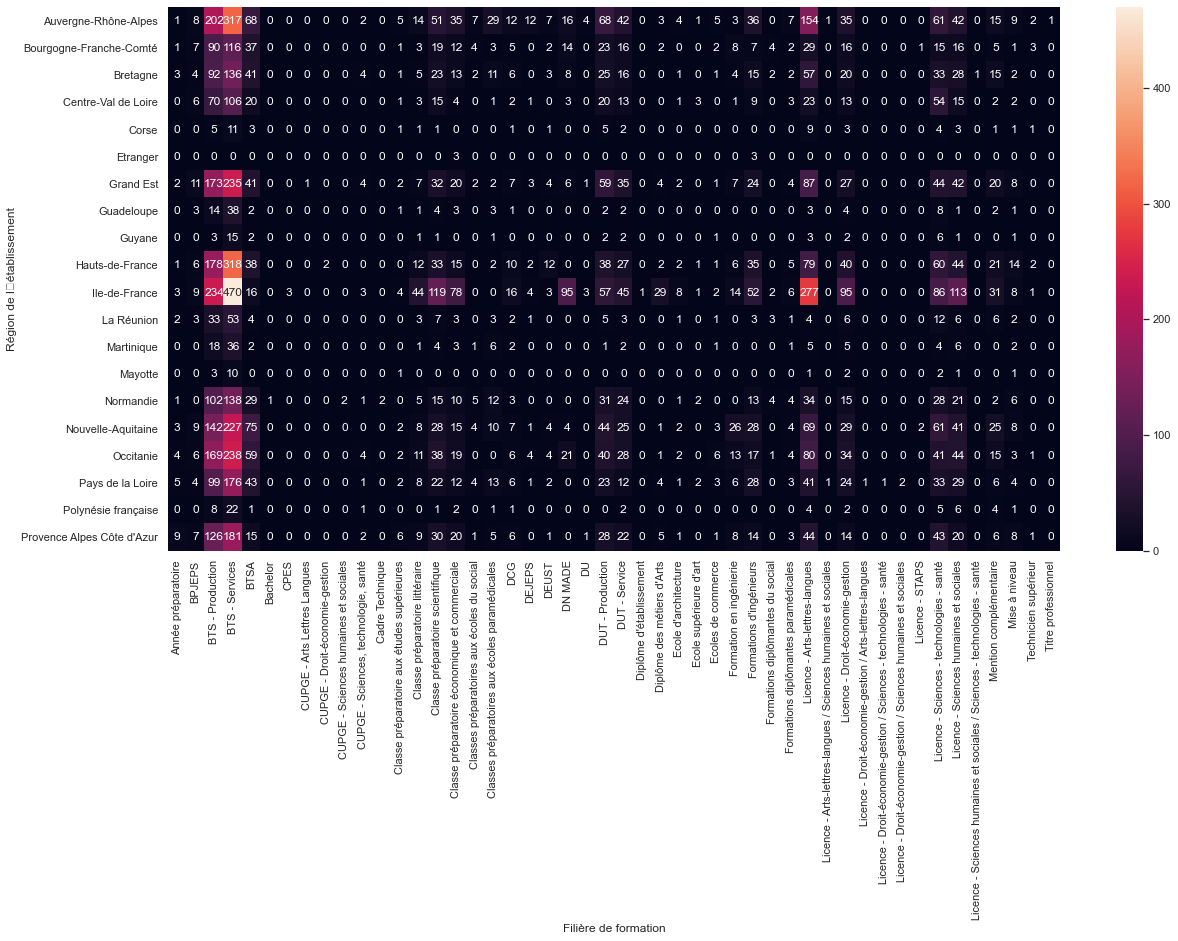

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df['Région de l\x92établissement'], df['Filière de formation']),annot=True,fmt='d')

## Test d’indépendance de khi deux

- **H0 : les deux variables sont indépendantes**
- **H1 : les deux variables sont liées**

In [54]:
def khi_deux(df):
    alpha = 0.05
    stat, p, dof, expected =chi2_contingency(df)
    if p < alpha:
        return 'H0 Rejetée -- test significatif au niveau 5%'
    else :
        return 'Non H0 Rejetée -- test non significatif au niveau 5%'

In [55]:
khi_deux(Tc)

'H0 Rejetée -- test significatif au niveau 5%'

# Modélisation

## ACP quanti 2018 (méthode 1)

In [56]:
from fanalysis.pca import PCA

In [57]:
# préparation des données pour l'ACP
#df_resu = df_resu.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = df_resu.values
features = df_resu.columns.values
names=df_resu.index.values

In [58]:
res_pca = PCA(std_unit=True,row_labels=names, col_labels=features)

In [59]:
res_pca

PCA(col_labels=array(['Capacité de l\x92établissement par formation',
       'Effectif total des candidats pour une formation',
       'Dont effectif des candidates pour une formation',
       'Effectif total des candidats en phase principale'], dtype=object),
    row_labels=array(['3IL', 'AFTRAL ISTELI',
       'AGROCAMPUS OUEST Angers - Horticulture - Paysage', ...,
       "École Nationale des Techniciens de l'Équipement (ENTE) - Etablissement de Valenciennes",
       "École Nationale des Techniciens de l'Équipement (ENTE) - Site d'Aix-en-Provence",
       "École Supérieure d'Art du Nord-Pas de Calais : Dunkerque-Tourcoing"],
      dtype=object))

In [60]:
res_pca.fit(X)

PCA(col_labels=array(['Capacité de l\x92établissement par formation',
       'Effectif total des candidats pour une formation',
       'Dont effectif des candidates pour une formation',
       'Effectif total des candidats en phase principale'], dtype=object),
    row_labels=array(['3IL', 'AFTRAL ISTELI',
       'AGROCAMPUS OUEST Angers - Horticulture - Paysage', ...,
       "École Nationale des Techniciens de l'Équipement (ENTE) - Etablissement de Valenciennes",
       "École Nationale des Techniciens de l'Équipement (ENTE) - Site d'Aix-en-Provence",
       "École Supérieure d'Art du Nord-Pas de Calais : Dunkerque-Tourcoing"],
      dtype=object))

In [61]:
#Analyse des valeurs propres
print("les valeurs propres en valeur absolue ", res_pca.eig_[0] )
print("les valeurs propres en pourcentage de la variance totale ", res_pca.eig_[1] )
print("les valeurs propres en pourcentage cumulé de la variance totale ", res_pca.eig_[2] )

les valeurs propres en valeur absolue  [3.53968063e+00 4.11370082e-01 4.81950703e-02 7.54216853e-04]
les valeurs propres en pourcentage de la variance totale  [8.84920158e+01 1.02842521e+01 1.20487676e+00 1.88554213e-02]
les valeurs propres en pourcentage cumulé de la variance totale  [ 88.49201576  98.77626782  99.98114458 100.        ]


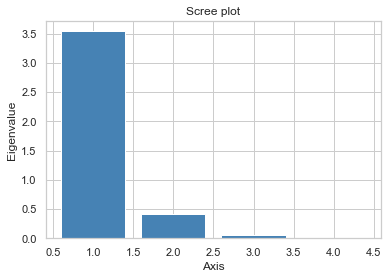

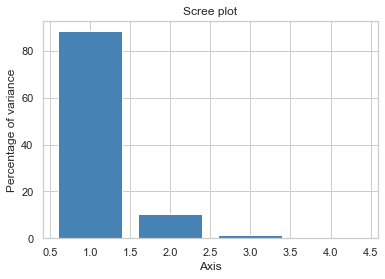

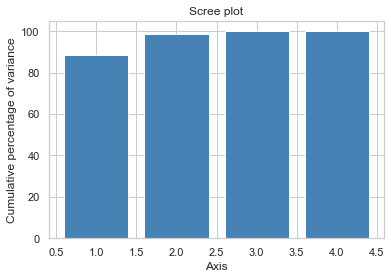

In [62]:
res_pca.plot_eigenvalues()
res_pca.plot_eigenvalues(type="percentage")
res_pca.plot_eigenvalues(type="cumulative")

#### graphiques

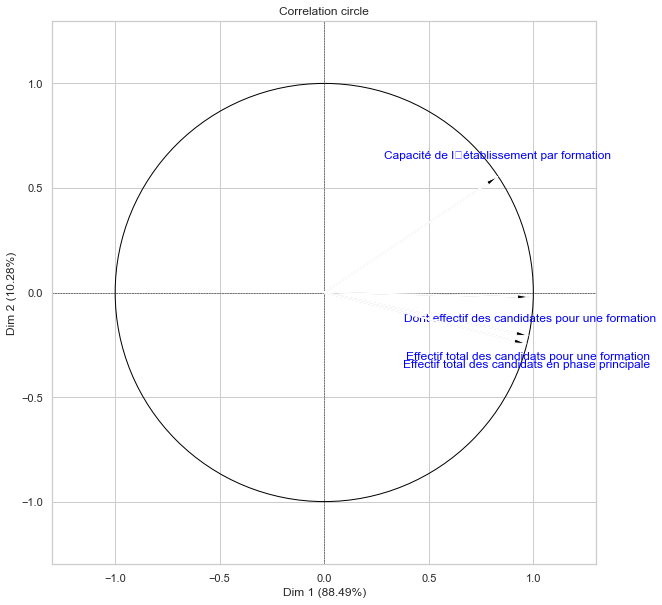

In [63]:
#res_pca.correlation_circle(num_x_axis=1, num_y_axis=2)
res_pca.correlation_circle(1, 2, figsize=(12, 10))

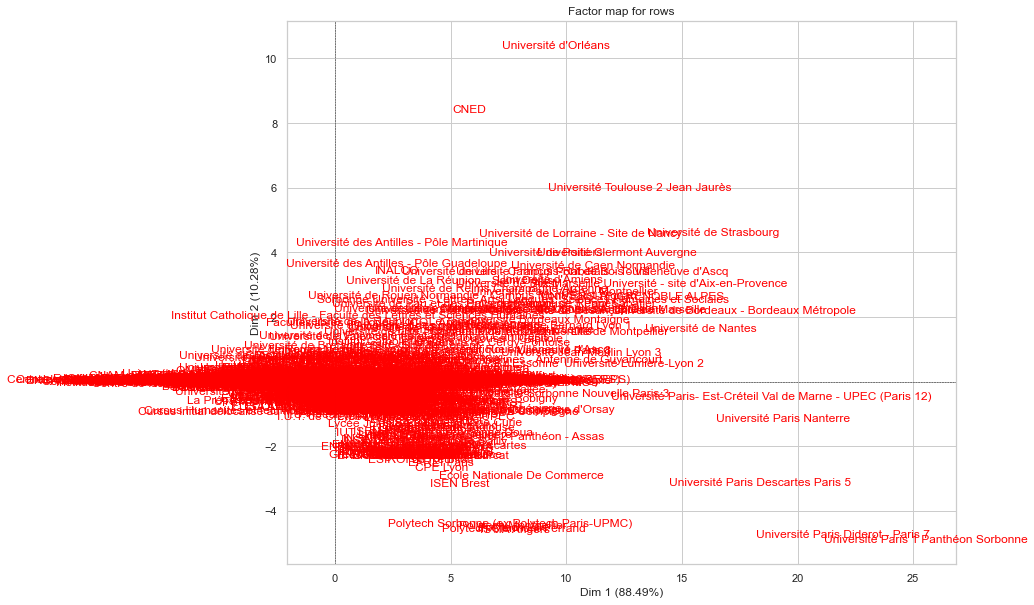

In [64]:
#res_pca.mapping_row(num_x_axis=1, num_y_axis=2)
res_pca.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(12, 10))

#### les individus

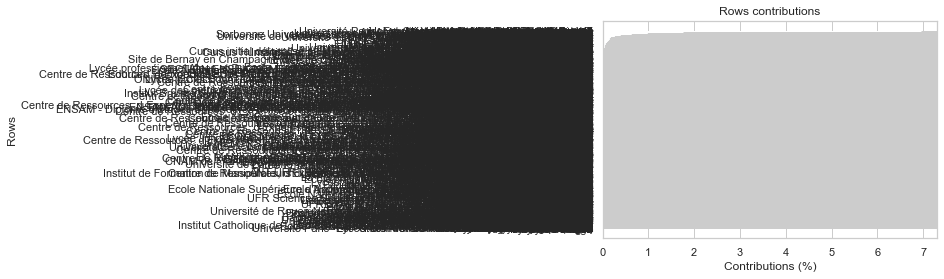

In [65]:
res_pca.plot_row_contrib(num_axis=1)

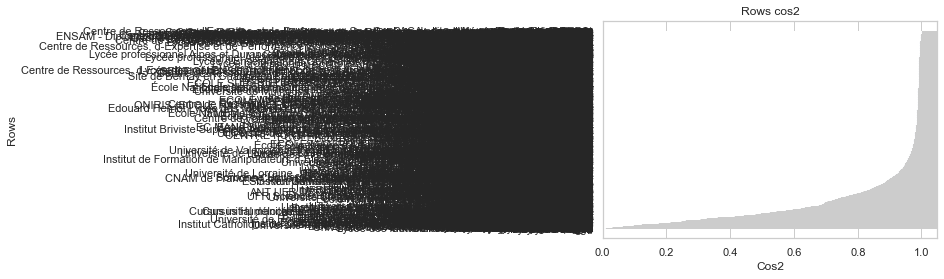

In [66]:
res_pca.plot_row_cos2(num_axis=1)

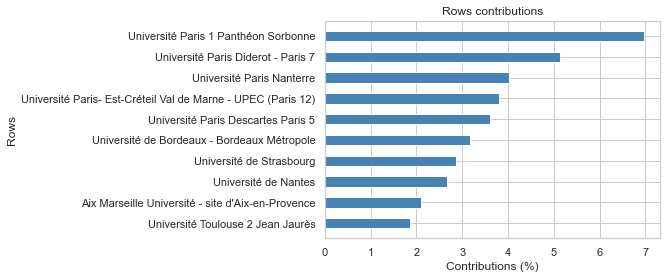

In [67]:
res_pca.plot_row_contrib(num_axis=1, nb_values=10)

#### les variables

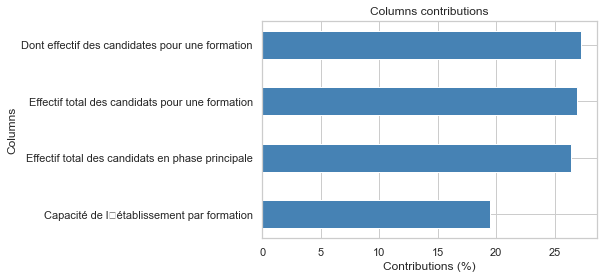

In [68]:
res_pca.plot_col_contrib(num_axis=1)

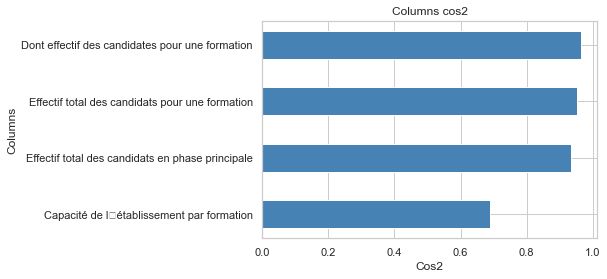

In [69]:
res_pca.plot_col_cos2(num_axis=1)

### ACP quanti 2018 (méthode 2)

In [70]:
from sklearn import decomposition
from sklearn import preprocessing
from functions import *   

In [71]:
# choix du nombre de composantes à calculer
n_comp =4

In [72]:
# préparation des données pour l'ACP
#dfresu_2018 = dfresu_2018.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = df_resu.values
features = df_resu.columns
names=df_resu.index

In [73]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)  #StandardScaler(with_std=False) pour centrer
X_scaled = std_scale.transform(X)

In [74]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=4)

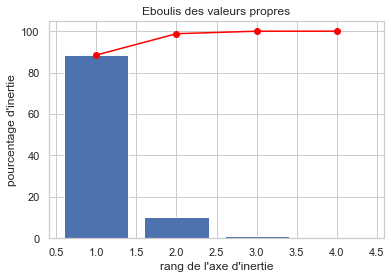

In [75]:
# Eboulis des valeurs propres
display_scree_plot(pca)

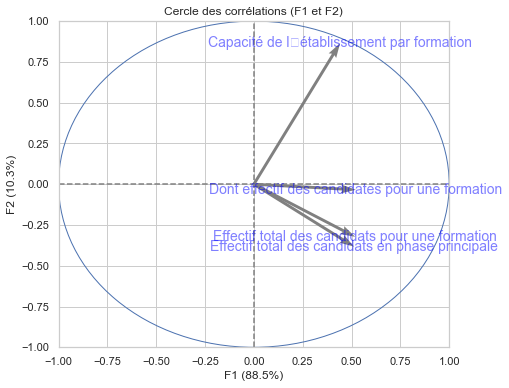

In [76]:
# Cercle des corrélations
pcs = pca.components_
#display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)])
#display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))
#display_circles(pcs, n_comp, pca, [(0,1)], lims=[.0155, .019, 0.053, .057], labels = np.array(features))
#display_circles(pcs, n_comp, pca, [(2,3)], lims=[-.035, -.026, -.03,-.016], labels = np.array(features))
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

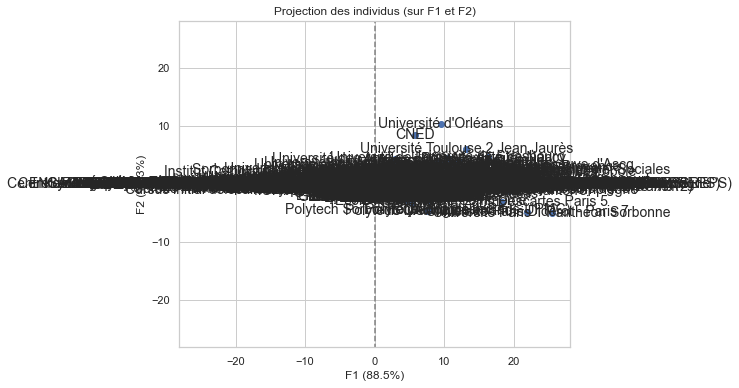

In [77]:
# Projection des individus
X_projected = pca.transform(X_scaled)
#display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var =names, alpha = 0.5) #pour la classification
#display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels = np.array(names))

plt.show()

### AFC 2018

In [78]:
from fanalysis.ca import CA

In [79]:
# préparation des données pour l'ACP
#df_resu = df_resu.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = Tc.values
features = Tc.columns.values
names=Tc.index.values

In [80]:
res_ca = CA(row_labels=names, col_labels=features)

In [81]:
res_ca .fit(X)

CA(col_labels=array(['Année préparatoire', 'BPJEPS', 'BTS - Production',
       'BTS - Services', 'BTSA', 'Bachelor', 'CPES',
       'CUPGE - Arts Lettres Langues', 'CUPGE - Droit-économie-gestion',
       'CUPGE - Sciences humaines et sociales',
       'CUPGE - Sciences, technologie, santé', 'Cadre Technique',
       'Classe préparatoire aux études supérieures',
       'Classe préparatoire littéraire',
       'Classe préparatoire scienti...
       'Titre professionnel'], dtype=object),
   row_labels=array(['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Corse', 'Etranger', 'Grand Est',
       'Guadeloupe', 'Guyane', 'Hauts-de-France', 'Ile-de-France',
       'La Réunion', 'Martinique', 'Mayotte', 'Normandie',
       'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire',
       'Polynésie française', "Provence Alpes Côte d'Azur"], dtype=object))

In [82]:
#Analyse des valeurs propres
print("les valeurs propres en valeur absolue ", res_ca .eig_[0] )
print(" ")
print("-----------------------------------------------------")
print(" ")
print("les valeurs propres en pourcentage de la variance totale ", res_ca .eig_[1] )
print(" ")
print("-----------------------------------------------------")
print(" ")
print("les valeurs propres en pourcentage cumulé de la variance totale ", res_ca .eig_[2] )

les valeurs propres en valeur absolue  [0.05829658 0.01879668 0.01728092 0.01462659 0.01202822 0.0106274
 0.00906852 0.00839872 0.00687479 0.00632701 0.00547994 0.0039621
 0.00308839 0.00276134 0.00221219 0.00157746 0.00123357 0.00090512
 0.00056664]
 
-----------------------------------------------------
 
les valeurs propres en pourcentage de la variance totale  [31.6636188  10.2093638   9.38608121  7.94439299  6.53309342  5.77224024
  4.92554006  4.56174114  3.73402067  3.43649894  2.97641374  2.15200395
  1.67744785  1.49981377  1.2015463   0.85679159  0.67001089  0.49161077
  0.30776987]
 
-----------------------------------------------------
 
les valeurs propres en pourcentage cumulé de la variance totale  [ 31.6636188   41.8729826   51.25906381  59.2034568   65.73655022
  71.50879046  76.43433053  80.99607167  84.73009234  88.16659128
  91.14300501  93.29500896  94.97245681  96.47227058  97.67381688
  98.53060847  99.20061937  99.69223013 100.        ]


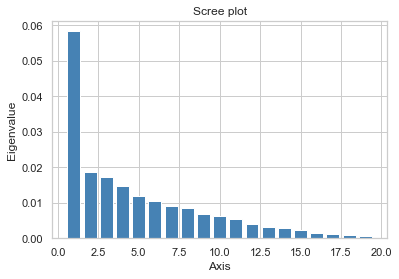

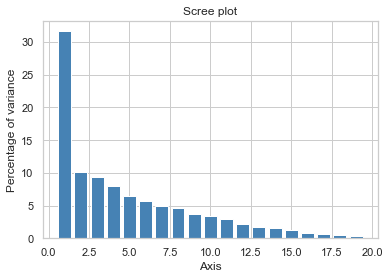

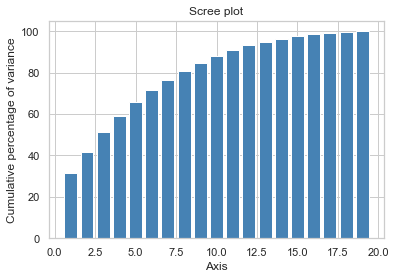

In [83]:
res_ca.plot_eigenvalues()
res_ca .plot_eigenvalues(type="percentage")
res_ca .plot_eigenvalues(type="cumulative")

In [84]:
#Extraction des statistiques sur les points lignes
df_rows = res_ca.row_topandas()
print(df_rows)

                            row_coord_dim1  row_coord_dim2  row_coord_dim3  \
Auvergne-Rhône-Alpes              0.034949       -0.129120       -0.083815   
Bourgogne-Franche-Comté           0.073456        0.063311       -0.264886   
Bretagne                          0.083635        0.000863       -0.120002   
Centre-Val de Loire               0.179184        0.061277        0.220497   
Corse                             0.025878        0.168377        0.028867   
Etranger                         -0.741991       -0.836398       -0.490253   
Grand Est                         0.055362        0.076722        0.006504   
Guadeloupe                        0.201663       -0.031626        0.349446   
Guyane                            0.237794       -0.036562        0.279109   
Hauts-de-France                   0.101636        0.108792        0.172679   
Ile-de-France                    -0.486594       -0.034716        0.020213   
La Réunion                        0.208473       -0.055423      

In [85]:
###Statistiques pour les points lignes
# Coordonnées des points lignes
print(res_ca.row_coord_)

[[ 3.49489784e-02 -1.29119586e-01 -8.38148474e-02 -8.98855263e-02
  -2.11915840e-01 -1.85710166e-02  2.75032342e-02 -4.94877342e-02
   9.01096189e-03 -4.87307864e-02  1.31807579e-02 -2.36545523e-02
   1.85580871e-02 -1.62797885e-02  5.13149367e-03 -1.48978152e-02
   1.77262263e-02  4.16774251e-03 -9.57068240e-03]
 [ 7.34564899e-02  6.33112530e-02 -2.64885883e-01  1.77688586e-01
   1.25266324e-01 -7.41322589e-02  8.61271976e-02 -4.53233485e-02
  -1.29939667e-01 -1.64016617e-01  2.84517672e-02  4.47913694e-02
  -2.69580498e-02  8.25912460e-02 -1.84384421e-02  1.88835730e-02
   1.01493937e-02 -1.47819792e-03 -3.45924668e-02]
 [ 8.36352425e-02  8.63359060e-04 -1.20001551e-01  4.16745580e-03
  -8.24649615e-03 -4.35930076e-02  3.15221788e-02  7.93725416e-02
   1.64874119e-01  7.39157405e-02  4.47344979e-02  1.50343773e-01
  -5.75619584e-03 -2.11627090e-02 -7.52982821e-02 -2.56639700e-02
  -3.93951590e-02 -1.27453639e-02 -9.47757932e-03]
 [ 1.79183776e-01  6.12772023e-02  2.20497114e-01  8.77

In [86]:
# Contributions des points lignes
print(res_ca.row_contrib_)

[[2.50515419e-01 1.06050228e+01 4.86053026e+00 6.60457465e+00
  4.46410101e+01 3.88019007e-01 9.97331918e-01 3.48650702e+00
  1.41218511e-01 4.48762612e+00 3.79064840e-01 1.68854424e+00
  1.33334775e+00 1.14758859e+00 1.42322357e-01 1.68227120e+00
  3.04562730e+00 2.29459696e-01 1.93279483e+00]
 [4.01488650e-01 9.24989099e-01 1.76119238e+01 9.36336217e+00
  5.65878608e+00 2.24307372e+00 3.54813597e+00 1.06093021e+00
  1.06532043e+01 1.84430592e+01 6.40764834e-01 2.19643873e+00
  1.02070770e+00 1.07152961e+01 6.66624720e-01 9.80542957e-01
  3.62219489e-01 1.04717018e-02 9.16031580e+00]
 [6.43851158e-01 2.12790194e-04 4.47153668e+00 6.37160251e-03
  3.03380346e-02 9.59525799e-01 5.87957575e-01 4.02510604e+00
  2.12175701e+01 4.63366934e+00 1.95956297e+00 3.06122474e+01
  5.75691058e-02 8.70307197e-01 1.37529865e+01 2.24047381e+00
  6.75104869e+00 9.63053657e-01 8.50621094e-01]
 [2.01311727e+00 7.30182519e-01 1.02838034e+01 1.92595231e+00
  3.81273031e-02 1.17362511e+00 3.03071322e+01 1.8

In [87]:
# Cos2 des points lignes
print(res_ca.row_cos2_)

[[1.42148589e-02 1.94025062e-01 8.17552219e-02 9.40271160e-02
  5.22637328e-01 4.01370030e-03 8.80321112e-03 2.85015661e-02
  9.44965364e-04 2.76363335e-02 2.02187521e-03 6.51182996e-03
  4.00811342e-03 3.08440289e-03 3.06451097e-04 2.58296635e-03
  3.65684173e-03 2.02150744e-04 1.06600537e-03]
 [2.72587820e-02 2.02492023e-02 3.54457141e-01 1.59501645e-01
  7.92710792e-02 2.77626278e-02 3.74737138e-02 1.03774364e-02
  8.52961835e-02 1.35900734e-01 4.08944710e-03 1.01352574e-02
  3.67132680e-03 3.44599100e-02 1.71749132e-03 1.80141779e-03
  5.20386839e-04 1.10385309e-05 6.04517905e-03]
 [7.24551293e-02 7.72099724e-06 1.49164065e-01 1.79900554e-04
  7.04416332e-04 1.96844897e-02 1.02925492e-02 6.52575957e-02
  2.81575893e-01 5.65932140e-02 2.07288701e-02 2.34132329e-01
  3.43211332e-04 4.63909233e-03 5.87300853e-02 6.82241564e-03
  1.60759339e-02 1.68265460e-03 9.30433526e-04]
 [1.25458840e-01 1.46724202e-02 1.89980804e-01 3.01146551e-02
  4.90260159e-04 1.33335391e-02 2.93812552e-01 1.6

In [88]:
#Extraction des statistiques sur les points colonnes
df_cols = res_ca.col_topandas()
print(df_cols)

                                                    col_coord_dim1  \
Année préparatoire                                        0.250848   
BPJEPS                                                    0.166199   
BTS - Production                                          0.119259   
BTS - Services                                            0.049814   
BTSA                                                      0.379310   
Bachelor                                                  1.271818   
CPES                                                     -2.015324   
CUPGE - Arts Lettres Langues                              0.229293   
CUPGE - Droit-économie-gestion                            0.420945   
CUPGE - Sciences humaines et sociales                     1.271818   
CUPGE - Sciences, technologie, santé                     -0.022574   
Cadre Technique                                           1.271818   
Classe préparatoire aux études supérieures                0.043833   
Classe préparatoire 

In [89]:
##Statistiques pour les points colonnes
# Coordonnées des points colonnes
print(res_ca.col_coord_)

[[ 2.50848373e-01  1.09447523e-01  1.09300609e-01 -2.03979628e-01
   5.07949488e-01 -2.74200992e-01  3.82487178e-01 -3.55514650e-01
  -1.25169616e-01  4.66628580e-01  1.15084361e-01  7.70922407e-02
   1.62674175e-01 -3.72126026e-01 -1.45354445e-01  4.09147405e-02
   4.67771797e-02  8.01017972e-03  4.25137643e-03]
 [ 1.66198648e-01  2.64760318e-01  4.26931430e-02  4.54921283e-02
   9.63466741e-02 -8.85225149e-02  1.24706399e-01 -2.73106254e-01
   1.03541608e-01 -1.58728423e-01  1.23989370e-01 -2.87995272e-02
   1.14125685e-01  2.26893937e-01 -3.66751586e-03 -5.49498875e-02
  -8.60469924e-02  9.11524260e-02  4.83777183e-02]
 [ 1.19259432e-01  8.67678576e-03  5.74629220e-03  5.16267771e-02
   1.49901621e-02  2.30577052e-02  4.46288632e-02 -2.80456292e-02
  -2.93622579e-02  2.21296505e-02  4.59363187e-02 -3.03995343e-02
  -1.90318630e-02  8.05110214e-03 -2.55389142e-02 -1.21828354e-02
   1.26250219e-02 -1.81149132e-02  5.61887315e-03]
 [ 4.98140876e-02  4.43549760e-03  8.73437635e-02 -1.46

In [90]:
# Contributions des points colonnes
print(res_ca.col_contrib_)

[[3.53171434e-01 2.08514727e-01 2.26195726e-01 9.30757217e-01
  7.01852299e+00 2.31481978e+00 5.27841396e+00 4.92388507e+00
  7.45666555e-01 1.12603009e+01 7.90793088e-01 4.90796904e-01
  2.80357216e+00 1.64084023e+01 3.12492550e+00 3.47222570e-01
  5.80376399e-01 2.31945886e-02 1.04365406e-02]
 [3.67644448e-01 2.89361467e+00 8.18399842e-02 1.09785600e-01
  5.98808801e-01 5.72132578e-01 1.33062969e+00 6.89074599e+00
  1.21000365e+00 3.08977444e+00 2.17675322e+00 1.62428129e-01
  3.27228676e+00 1.44657860e+01 4.71777343e-03 1.48522417e+00
  4.65718097e+00 7.12276581e+00 3.20478024e+00]
 [4.01642605e+00 6.59377194e-02 3.14561782e-02 2.99988193e+00
  3.07544980e-01 8.23573985e-01 3.61570213e+00 1.54175225e+00
  2.06451020e+00 1.27422977e+00 6.33919234e+00 3.83977388e+00
  1.93076062e+00 3.86445442e-01 4.85377010e+00 1.54894646e+00
  2.12714584e+00 5.96851072e+00 9.17248925e-01]
 [1.13129578e+00 2.78175177e-02 1.17330751e+01 3.90900002e-03
  2.16797251e-01 2.83922883e+00 5.38681717e-01 3.8

In [91]:
# Cos2 des points colonnes
print(res_ca.col_cos2_)

[[5.34641936e-02 1.01777626e-02 1.01504573e-02 3.53520038e-02
  2.19220669e-01 6.38819974e-02 1.24300881e-01 1.07387924e-01
  1.33118460e-02 1.85004850e-01 1.12531231e-02 5.04965587e-03
  2.24842119e-02 1.17657749e-01 1.79513486e-02 1.42232894e-03
  1.85912466e-03 5.45161233e-05 1.53567589e-05]
 [7.96987521e-02 2.02256430e-01 5.25911668e-03 5.97130235e-03
  2.67836651e-02 2.26101809e-02 4.48718555e-02 2.15208708e-01
  3.09333077e-02 7.26952361e-02 4.43573361e-02 2.39313538e-03
  3.75805684e-02 1.48539628e-01 3.88097238e-05 8.71224673e-03
  2.13632804e-02 2.39735867e-02 6.75285326e-03]
 [5.33407963e-01 2.82352588e-03 1.23836719e-03 9.99594948e-02
  8.42726561e-03 1.99391293e-02 7.46974321e-02 2.94988034e-02
  3.23335152e-02 1.83663617e-02 7.91382423e-02 3.46583502e-02
  1.35842802e-02 2.43099853e-03 2.44612634e-02 5.56635338e-03
  5.97775762e-03 1.23068395e-02 1.18405664e-03]
 [1.70419347e-01 1.35113652e-03 5.23936119e-01 1.47743564e-04
  6.73836947e-03 7.79698995e-02 1.26231654e-02 8.4

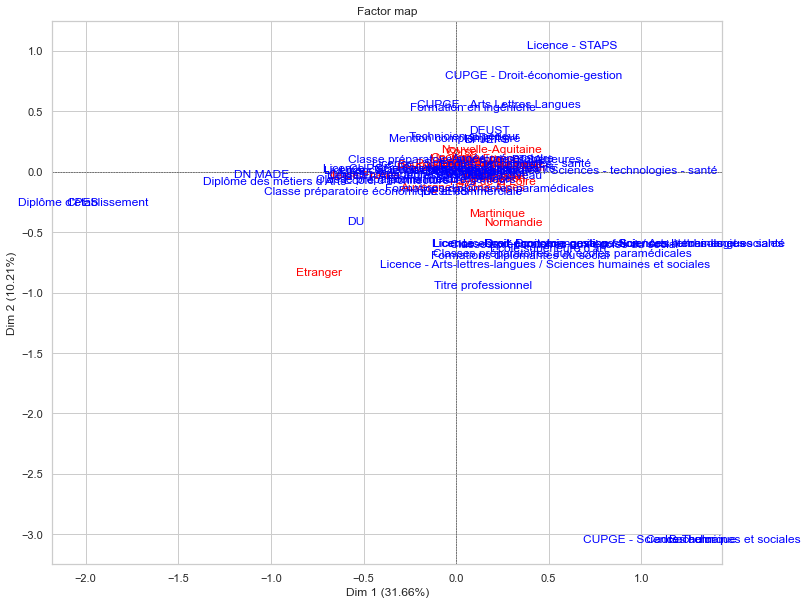

In [92]:
##Graphiques
#Graphiques factoriels
# Mapping simultané des points lignes et colonnes
res_ca.mapping(num_x_axis=1, num_y_axis=2,figsize=(12, 10))

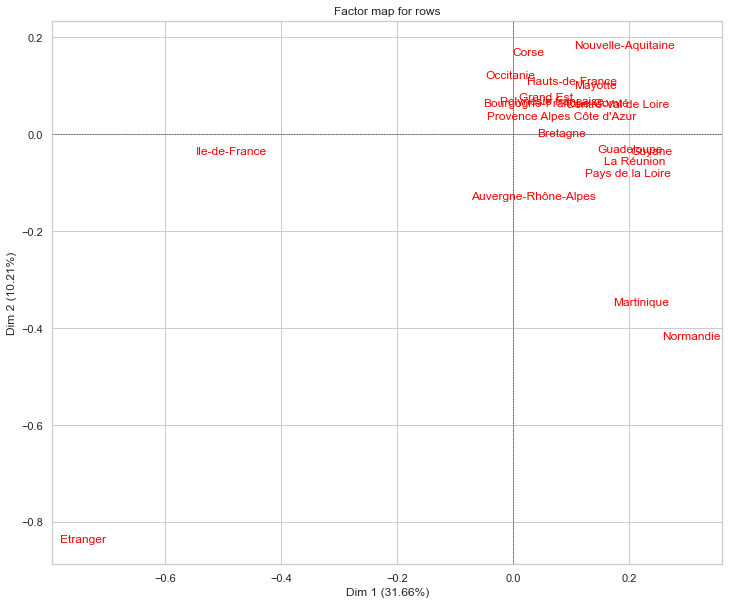

In [93]:
# Mapping des points lignes
res_ca.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(12, 10))

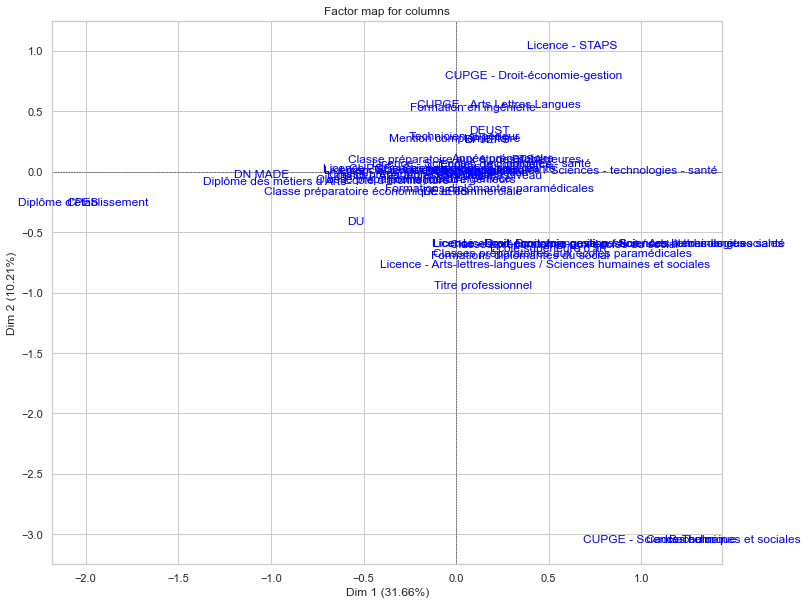

In [94]:
# Mapping des points colonnes
res_ca.mapping_col(num_x_axis=1, num_y_axis=2,figsize=(12, 10))

#### les lignes

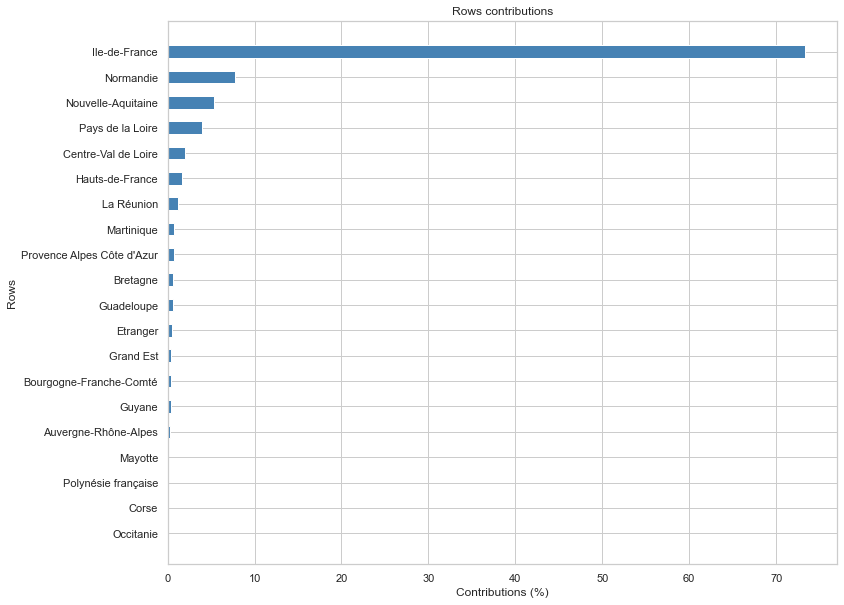

In [95]:
#Analyse du 1er axe - Points lignes
#Classement des points lignes en fonction de leur contribution au 1er axe
res_ca.plot_row_contrib(num_axis=1,figsize=(12, 10))

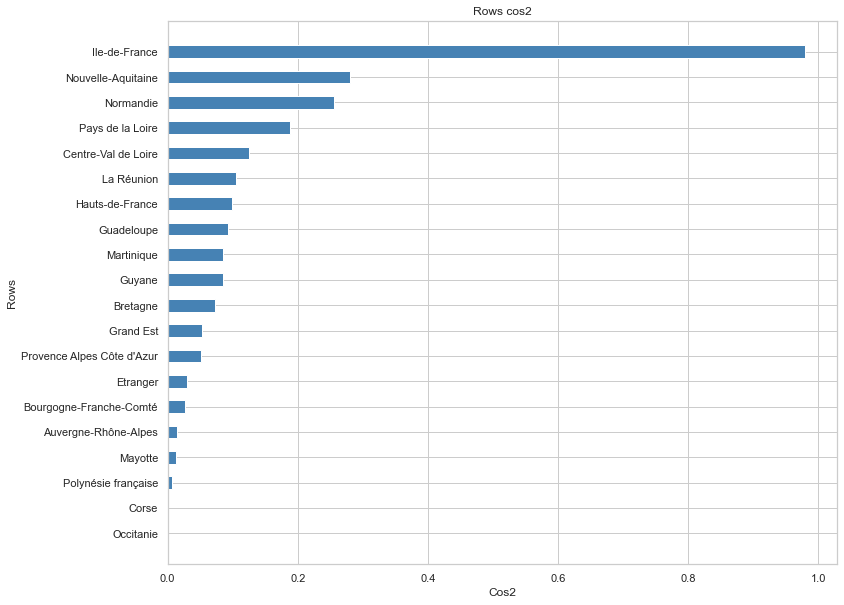

In [96]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
res_ca.plot_row_cos2(num_axis=1,figsize=(12, 10))

#### les colonnes

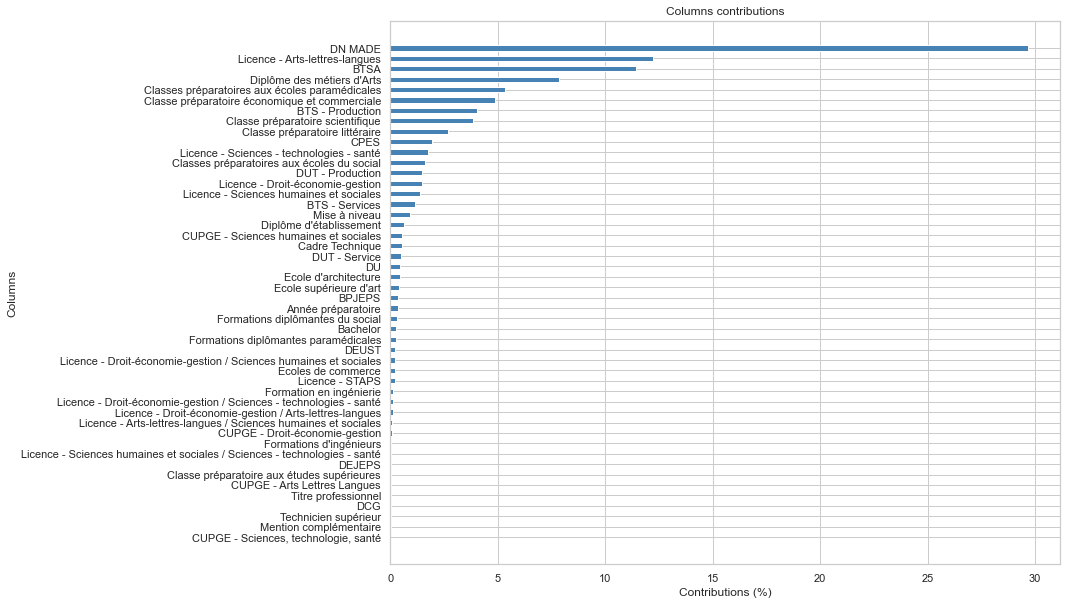

In [97]:
#Analyse du 1er axe - Points colonnes
# Classement des points colonnes en fonction de leur contribution au 1er axe
res_ca.plot_col_contrib(num_axis=1,figsize=(12, 10))

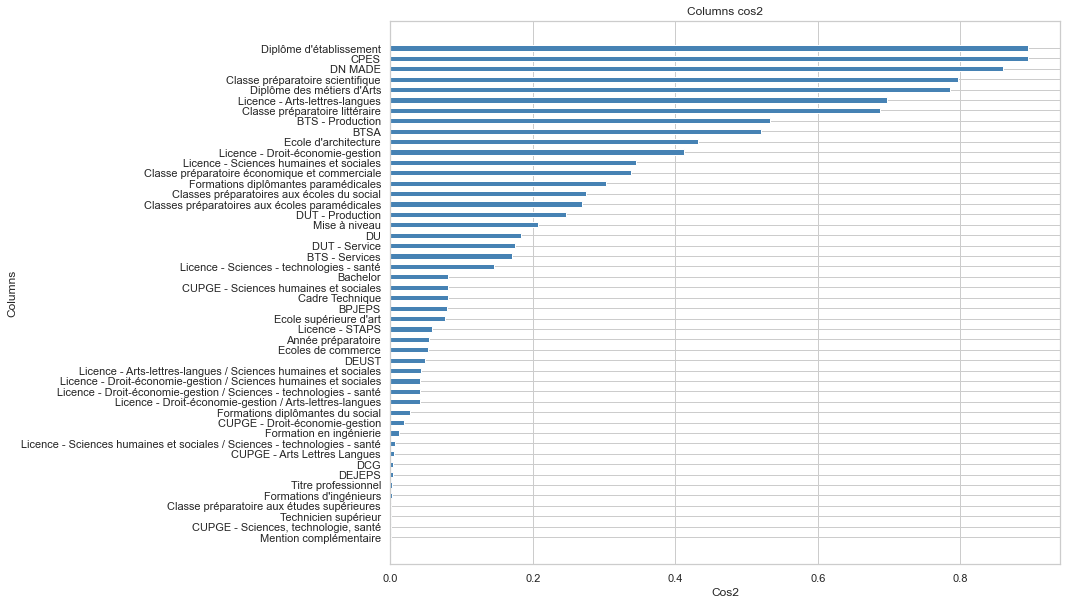

In [98]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
res_ca.plot_col_cos2(num_axis=1,figsize=(12, 10))

## Machine Learning 2018

### Regression quanti   2018

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn import metrics
from fanalysis.pca import PCA

In [100]:
df_resu.tail(5)

Capacité de létablissement par formation  \
Établissement                                                                                   
lycée E.P.I.D.                                                                            120   
lycée Georges BRIERE                                                                       81   
École Nationale des Techniciens de l'Équipement...                                         24   
École Nationale des Techniciens de l'Équipement...                                         24   
École Supérieure d'Art du Nord-Pas de Calais : ...                                         70   

                                                    Effectif total des candidats pour une formation  \
Établissement                                                                                         
lycée E.P.I.D.                                                                                  359   
lycée Georges BRIERE                                                                            426   
École Nationale des Techniciens de l'Équipement...                                               88   
École Nationale des Techniciens de l'Équipement...                                               88   
École Supérieure d'Art du Nord-Pas de Calais : ...                                              282   

                                                    Dont effectif des candidates pour une formation  \
Établissement                                                                                         
lycée E.P.I.D.                                                                                   11   
lycée Georges BRIERE                                                                             64   
École Nationale des Techniciens de l'Équipement...                                               21   
École Nationale des Techniciens de l'Équipement...                                               27   
École Supérieure d'Art du Nord-Pas de Calais : ...                                              170   

                                                    Effectif total des candidats en phase principale  
Établissement                                                                                         
lycée E.P.I.D.                                                                                   296  
lycée Georges BRIERE                                                                             376  
École Nationale des Techniciens de l'Équipement...                                                63  
École Nationale des Techniciens de l'Équipement...                                                64  
École Supérieure d'Art du Nord-Pas de Calais : ...                                               137

In [101]:
# préparation des données pour l'ACP
#dfresu_2018 = dfresu_2018.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = df_resu.values[:,1:4]
target=df_resu.values[:,0]
features = df_resu.columns
names=df_resu.index

In [102]:
target

array([85, 15, 47, ..., 24, 24, 70], dtype=int64)

In [103]:
X

array([[9091, 2359, 9084],
       [  24,    6,   19],
       [ 200,  113,  200],
       ...,
       [  88,   21,   63],
       [  88,   27,   64],
       [ 282,  170,  137]], dtype=int64)

In [104]:
# 30% des données dans le jeu de test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, target,test_size=0.3,random_state=0) 

In [105]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

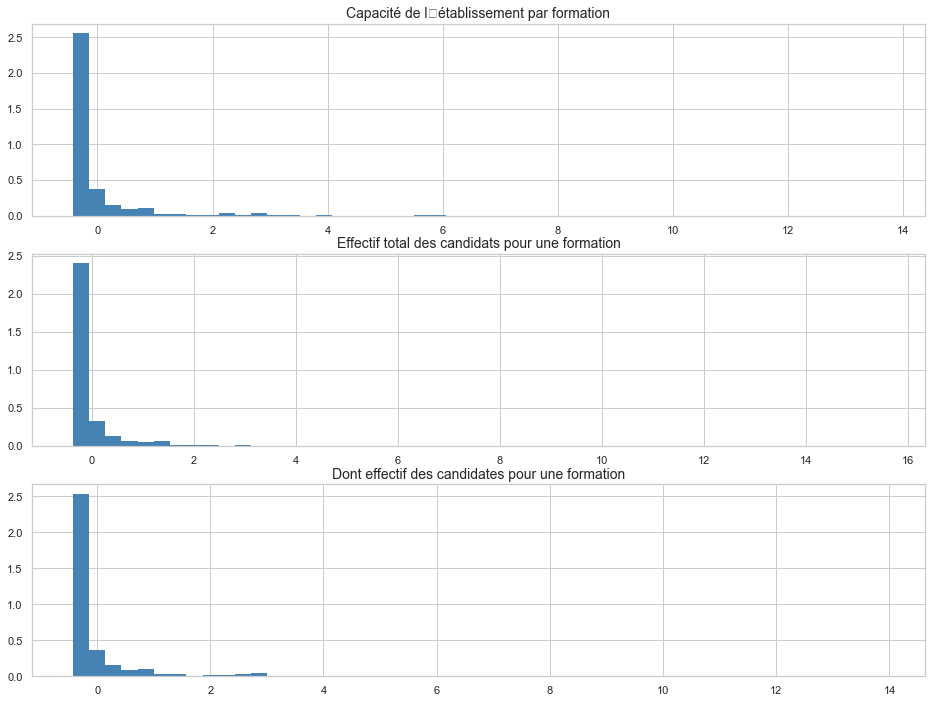

In [106]:
fig = plt.figure(figsize=(16, 12))
for col in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,1, (col+1))
    h = ax.hist(X_train_std[:, col], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(features[col], fontsize=14)

In [107]:
y_train= y_train.reshape(-1,1)
y_test= y_test.reshape(-1,1)

In [108]:
model =LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7997838735092127

## Comparaison

In [109]:
# une Analyse en Composantes Prnicipales (4 axes retenus) puis une régression linéaire multiple
pipe = Pipeline([("pca", PCA(n_components=4, stats=False)), ("linear_regression", LinearRegression())])

# sans transformation des données
model =LinearRegression()

In [110]:
dictionnaire_modele = {'PCA_Regression' : pipe,  'regression':model }

In [111]:
def evaluation(model):
    model.fit(X_train, y_train)
    model.score(X_test, y_test)
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    print(' ')
    y_pred= model.predict(X_test)
    y_pred= y_pred.reshape(-1,1)
    
    print('SCORE:',model.score(X_test, y_test))
    print(' ')
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print(' ')
    print('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print(' ')
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print("\n")
    
    plt.figure(figsize=(15,8))
    plt.scatter(X_test[:,1],y_test)
    plt.scatter(X_test[:,1],y_pred,c='r')
    plt.show()
    
    plt.figure(figsize=(16,8))
    plt.plot(y_test,label ='Test')
    plt.plot(y_pred, label = 'predict')
    plt.show()

PCA_Regression
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 
SCORE: 0.7997838735092127
 
MAE: 132.7599375889462
 
MSE: 144724.5649085001
 
RMSE: 380.4268193864624




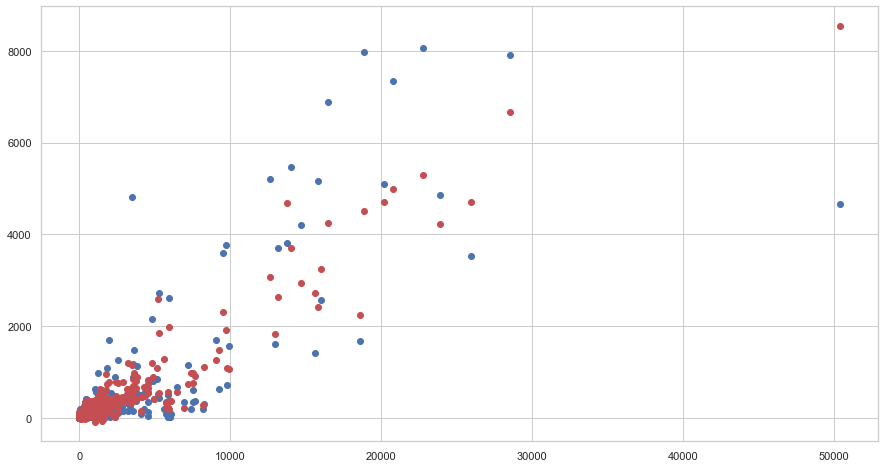

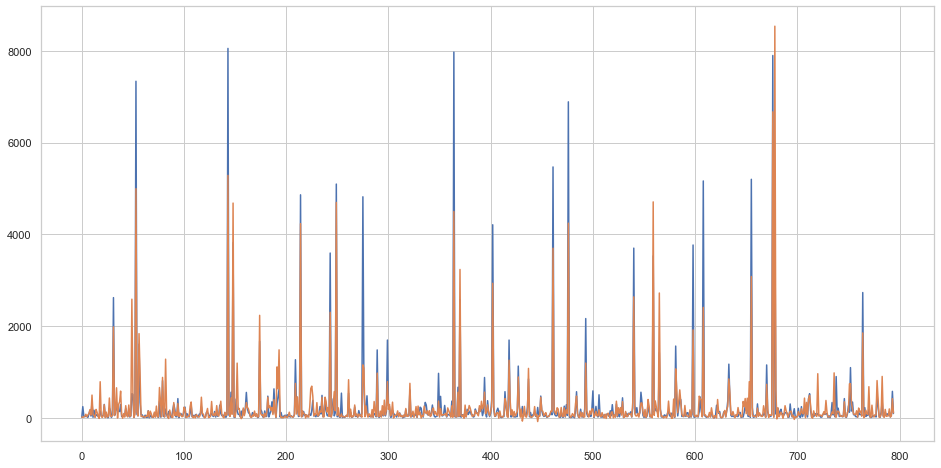

regression
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 
SCORE: 0.7997838735092127
 
MAE: 132.75993758894626
 
MSE: 144724.56490850015
 
RMSE: 380.4268193864625




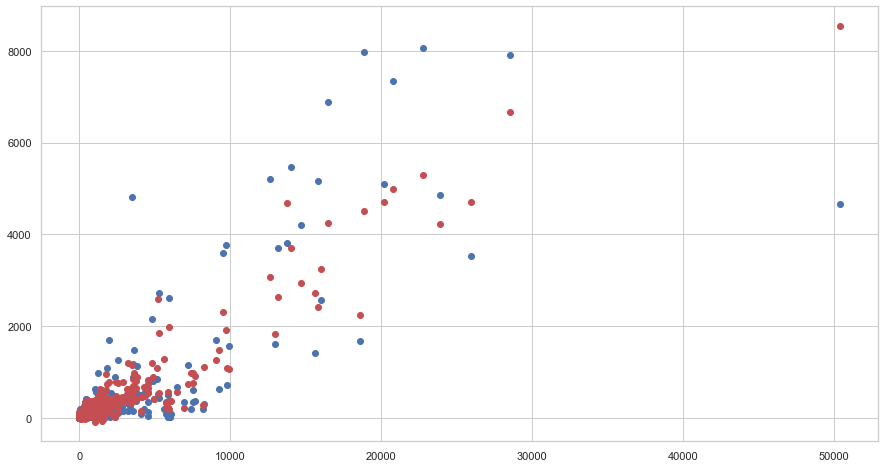

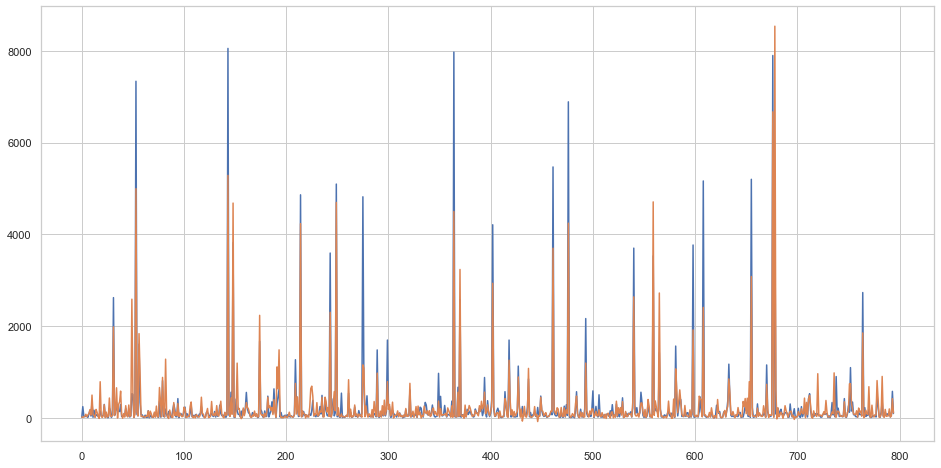

In [112]:
for name, model in dictionnaire_modele.items():
    print(name)
    evaluation(model) 

### Optimisation du modèle

In [113]:
param = [{"pca__n_components": [x + 1 for x in range(4)]}]

In [114]:
pipe = Pipeline([("pca", PCA(stats=False)), ("linear_regression", LinearRegression())])

In [115]:
grid_search = GridSearchCV(pipe, param_grid=param, scoring="neg_mean_squared_error")

In [116]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA(stats=False)),
                                       ('linear_regression',
                                        LinearRegression())]),
             param_grid=[{'pca__n_components': [1, 2, 3, 4]}],
             scoring='neg_mean_squared_error')

In [117]:
print("score optimal : ",grid_search.best_score_)
print(" ")
print("RMSE optimal : ",np.sqrt(-grid_search.best_score_))
print(" ")
print("paramètre optimal : ",grid_search.best_params_)

score optimal :  -210507.0670263262
 
RMSE optimal :  458.8104914083005
 
paramètre optimal :  {'pca__n_components': 3}


In [118]:
grid_search.predict(X_test).reshape(-1,1)

array([[ 2.24543730e+01],
       [ 1.53072619e+01],
       [ 2.72048249e+01],
       [ 3.98839707e+01],
       [ 8.41567329e+01],
       [ 3.06002281e+01],
       [ 6.84654400e+01],
       [ 1.01196213e+02],
       [ 1.85171475e+02],
       [ 6.40586721e+01],
       [ 5.01652458e+02],
       [ 8.19761262e+01],
       [ 5.56571833e+01],
       [ 1.86332511e+01],
       [ 1.89530396e+02],
       [ 1.23392101e+02],
       [ 3.60648316e+01],
       [-6.35658826e+00],
       [ 7.92490975e+02],
       [ 4.33063296e+01],
       [ 1.35367732e+01],
       [ 5.57525696e+01],
       [ 2.91802470e+02],
       [ 1.00541332e+01],
       [ 1.31035825e+02],
       [ 2.18474792e+01],
       [ 3.43610245e+01],
       [ 4.37928073e+02],
       [ 4.96889205e+01],
       [ 3.19791067e+01],
       [ 6.51514751e+01],
       [ 1.98595492e+03],
       [ 5.72200143e+01],
       [ 1.86842553e+02],
       [ 6.60442140e+02],
       [ 1.74077090e+00],
       [ 2.95528620e+02],
       [ 3.55883510e+02],
       [ 5.8

In [119]:
def graph():
    grid_search.fit(X_train, y_train)
    grid_search.score(X_test, y_test)
    y_pred= grid_search.predict(X_test)
    y_pred= y_pred.reshape(-1,1)
    
    plt.figure(figsize=(15,8))
    plt.scatter(X_test[:,1],y_test)
    plt.scatter(X_test[:,1],y_pred,c='r')
    plt.show()
    
    plt.figure(figsize=(16,8))
    plt.plot(y_test,label ='Test')
    plt.plot(y_pred, label = 'predict')
    plt.show()

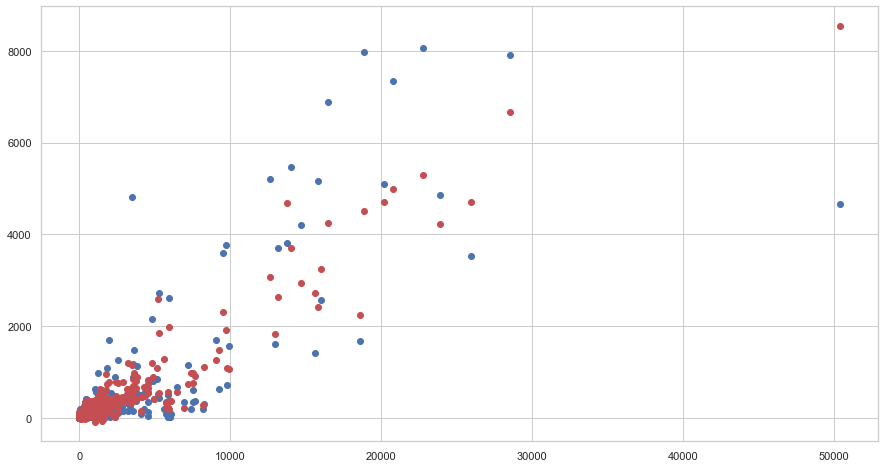

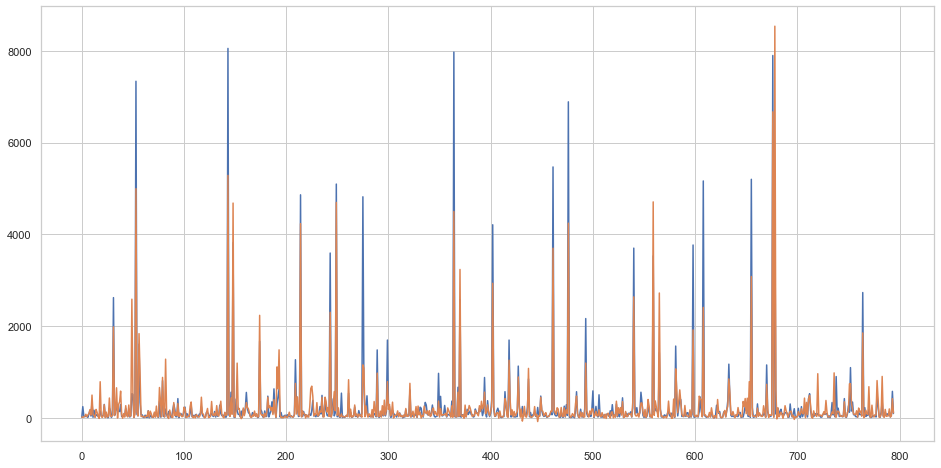

In [120]:
graph()